In [ ]:
#font 설치하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 16 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (25.0 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120831 files and direc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
Carbonated_Drinks = pd.read_excel('/content/drive/MyDrive/Marketlink/탄산음료/탄산음료_DATA.xlsx', dtype={'바코드': str})
Carbonated_Drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65962 entries, 0 to 65961
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   카테고리    65962 non-null  object 
 1   바코드     65962 non-null  object 
 2   기간      65962 non-null  object 
 3   채널      65962 non-null  object 
 4   매출액     65962 non-null  float64
 5   수량      65962 non-null  float64
 6   단가      65960 non-null  float64
dtypes: float64(3), object(4)
memory usage: 3.5+ MB


In [ ]:
Carbonated_Drinks.isnull().sum()

카테고리    0
바코드     0
기간      0
채널      0
매출액     0
수량      0
단가      2
dtype: int64

In [ ]:
#단가 null 찾기
missing_price_rows = Carbonated_Drinks[Carbonated_Drinks['단가'].isnull()]
print(missing_price_rows)


       카테고리            바코드       기간    채널          매출액   수량  단가
49769  탄산음료  8801097168718  M202302  대형마트 -7761.769914  0.0 NaN
58199  탄산음료  8801223009489  M202306  대형마트  3378.367299  0.0 NaN


In [ ]:
Carbonated_Drinks = Carbonated_Drinks[Carbonated_Drinks['단가'].notnull()]

In [ ]:
Carbonated_Drinks.isnull().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65960 entries, 0 to 65961
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   카테고리    65960 non-null  bool 
 1   바코드     65960 non-null  bool 
 2   기간      65960 non-null  bool 
 3   채널      65960 non-null  bool 
 4   매출액     65960 non-null  bool 
 5   수량      65960 non-null  bool 
 6   단가      65960 non-null  bool 
dtypes: bool(7)
memory usage: 966.2 KB


In [ ]:
Carbonated_info = pd.read_excel('/content/drive/MyDrive/Marketlink/탄산음료/SJ_DY_aT미셋업1차_탄산음료_완_완.xlsx', dtype={'BARCODE': str})
Carbonated_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   SEQ              1213 non-null   int64 
 1   BARCODE          1213 non-null   object
 2   BAR_SF           1213 non-null   int64 
 3   QTY              1213 non-null   int64 
 4   SUPER_CAT        1213 non-null   object
 5   GS1Link          1213 non-null   object
 6   CATEGORY검증       1213 non-null   object
 7   DESCK검증          1213 non-null   object
 8   MANUFACTURER 검증  1213 non-null   object
 9   BRANDMAIN        1213 non-null   object
 10  PB 검증            1213 non-null   object
 11  속성1              1213 non-null   object
dtypes: int64(3), object(9)
memory usage: 113.8+ KB


/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


In [ ]:
Carbonated_info.isnull().sum()

SEQ                0
BARCODE            0
BAR_SF             0
QTY                0
SUPER_CAT          0
GS1Link            0
CATEGORY검증         0
DESCK검증            0
MANUFACTURER 검증    0
BRANDMAIN          0
PB 검증              0
속성1                0
dtype: int64

In [ ]:
Carbonated_Drinks.head()

,카테고리,바코드,기간,채널,매출액,수량,단가
0,탄산음료,0000000028886,M202005,일반슈퍼,4.836089e+05,33.352336,14500.0
1,탄산음료,0000000028886,M202009,일반슈퍼,8.574626e+05,59.135350,14500.0
2,탄산음료,0000000028886,M202010,일반슈퍼,6.788794e+05,46.819272,14500.0
3,탄산음료,0000000028886,M202011,일반슈퍼,1.122287e+06,77.399093,14500.0
4,탄산음료,0000000028886,M202012,일반슈퍼,6.417599e+05,44.259301,14500.0


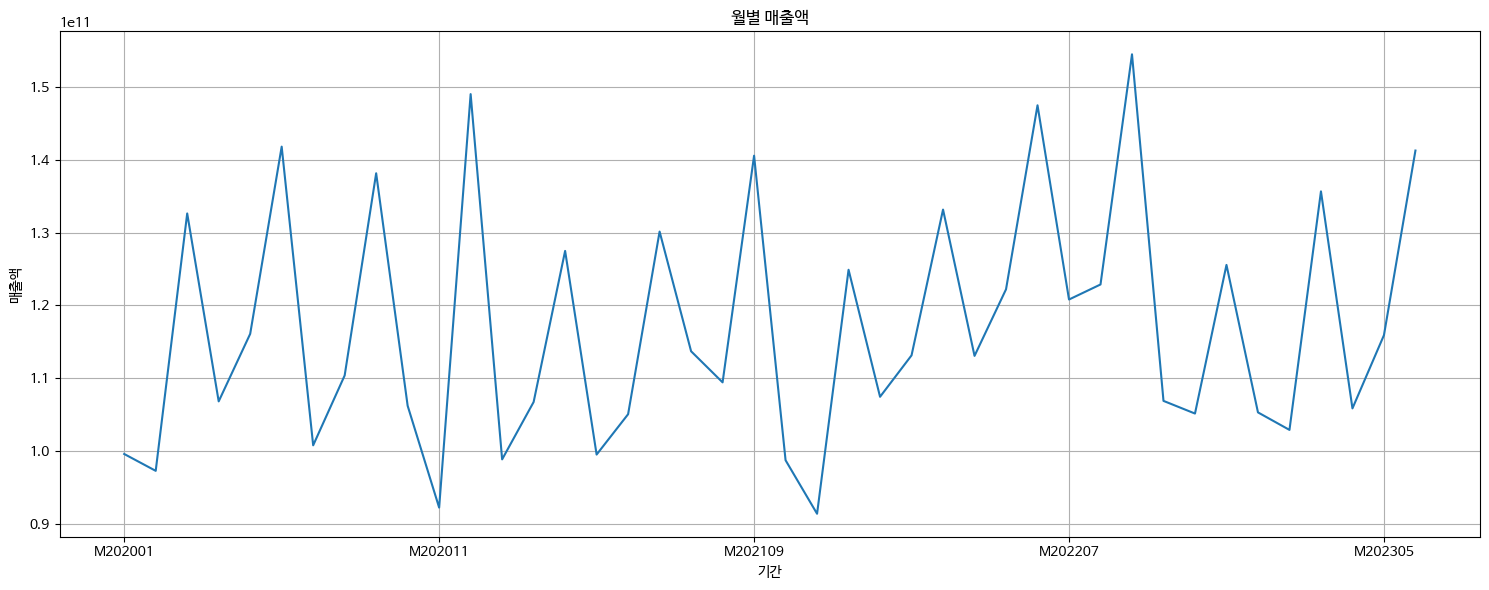

In [ ]:
plt.rc('font', family='NanumBarunGothic')
monthly_sales = Carbonated_Drinks.groupby('기간')['매출액'].sum()
plt.rcParams['font.family']

# 결과를 그래프로 표현
plt.figure(figsize=(15, 6))
monthly_sales.plot(kind='line')
plt.title('월별 매출액')
plt.xlabel('기간')
plt.ylabel('매출액')
plt.grid(True)
plt.tight_layout()
plt.show()


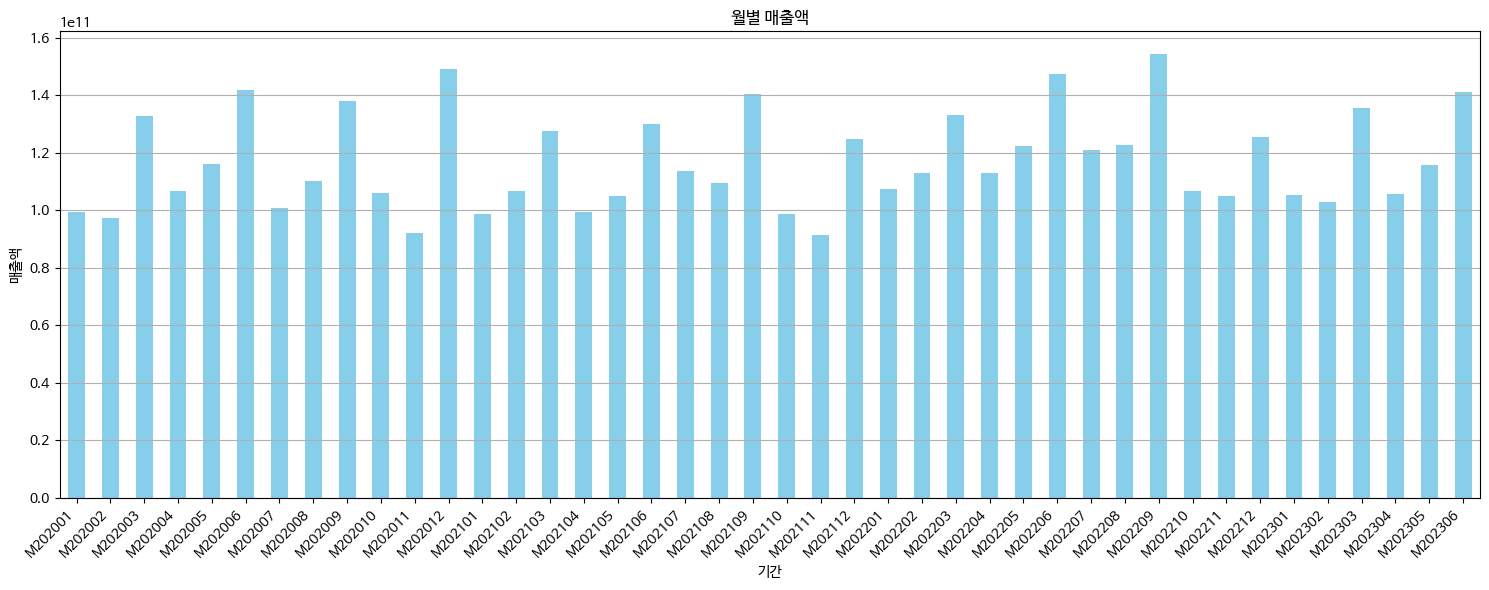

In [ ]:
# '기간' 컬럼을 기준으로 그룹화하고, '매출액'의 합계를 구합니다.
monthly_sales = Carbonated_Drinks.groupby('기간')['매출액'].sum()

# 결과를 막대그래프로 표현
plt.figure(figsize=(15, 6))
monthly_sales.plot(kind='bar', color='skyblue')

plt.title('월별 매출액')
plt.xlabel('기간')
plt.ylabel('매출액')
plt.grid(axis='y')

# x축의 레이블을 모두 표시합니다.
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

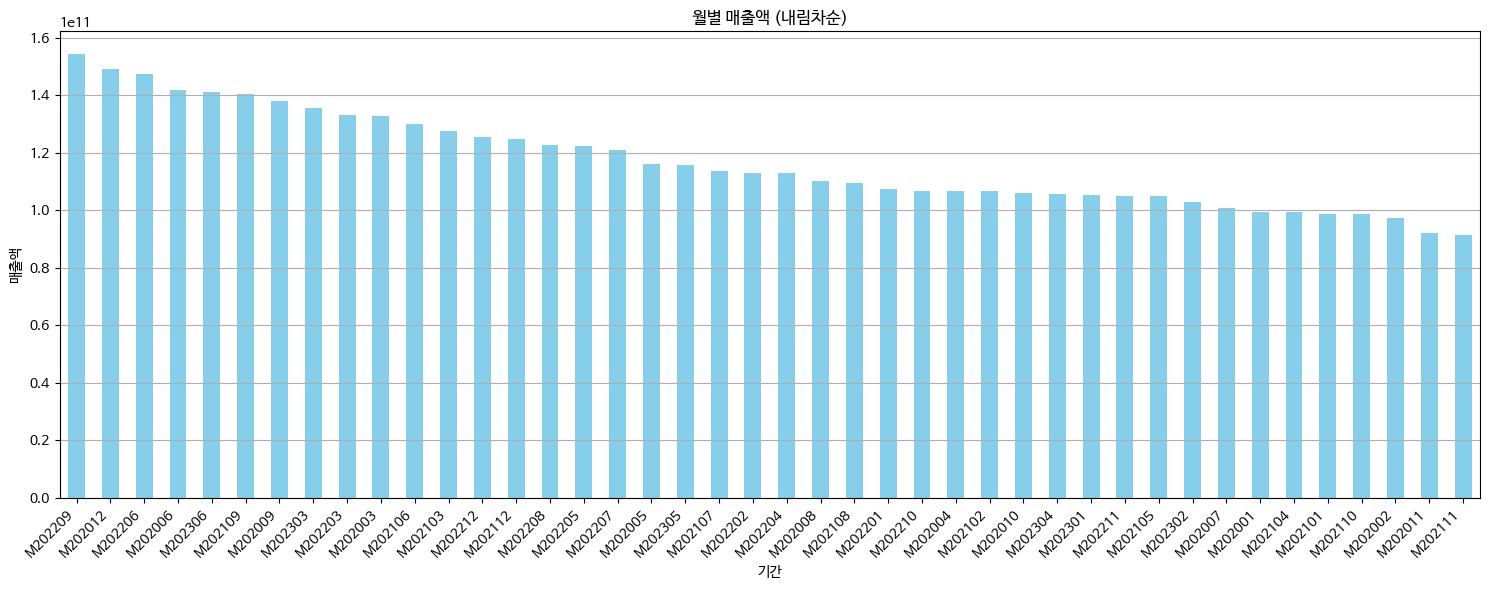

In [ ]:
# '기간' 컬럼을 기준으로 그룹화하고, '매출액'의 합계를 구한 뒤 내림차순으로 정렬합니다.
monthly_sales = Carbonated_Drinks.groupby('기간')['매출액'].sum().sort_values(ascending=False)

# 결과를 막대그래프로 표현
plt.figure(figsize=(15, 6))
monthly_sales.plot(kind='bar', color='skyblue')

plt.title('월별 매출액 (내림차순)')
plt.xlabel('기간')
plt.ylabel('매출액')
plt.grid(axis='y')

# x축의 레이블을 모두 표시합니다.
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<Figure size 1500x600 with 0 Axes>

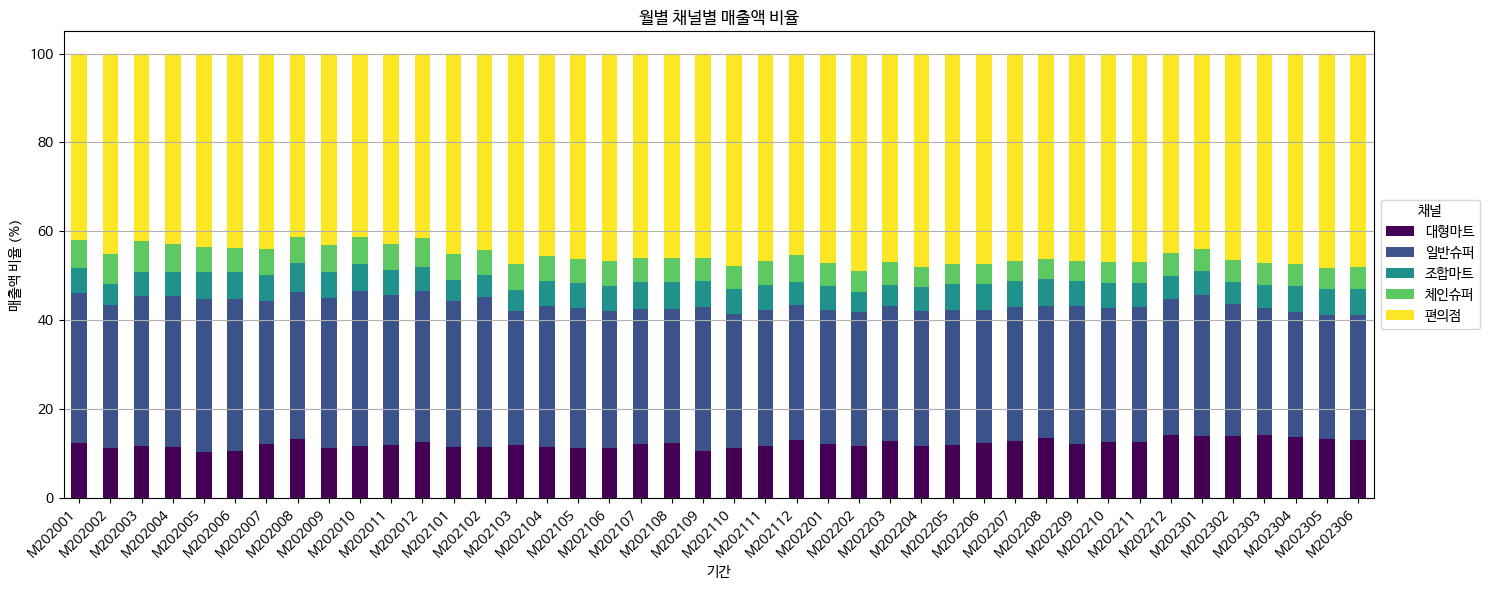

In [ ]:
# '기간'과 '채널'을 기준으로 그룹화하고, '매출액'의 합계를 구합니다.
channel_sales = Carbonated_Drinks.groupby(['기간', '채널'])['매출액'].sum().unstack()

# 각 월별 총 매출액으로 각 채널의 매출액을 나누어 비율을 계산합니다.
channel_sales_percentage = channel_sales.divide(channel_sales.sum(axis=1), axis=0) * 100

# 비율 데이터를 막대그래프로 표현합니다.
plt.figure(figsize=(15, 6))
channel_sales_percentage.plot(kind='bar', stacked=True, figsize=(15, 6), colormap="viridis")

plt.title('월별 채널별 매출액 비율')
plt.xlabel('기간')
plt.ylabel('매출액 비율 (%)')
plt.grid(axis='y')
plt.legend(title='채널', loc='center left', bbox_to_anchor=(1, 0.5))

# x축의 레이블을 모두 표시합니다.
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# 'BARCODE'에서 앞 7자리 추출
Carbonated_info['BARCODE_7'] = Carbonated_info['BARCODE'].astype(str).str[:7]

# 'BARCODE_7'과 'MANUFACTURER' 선택
result = Carbonated_info[['BARCODE_7', 'MANUFACTURER 검증']]

# 중복된 행 제거
result = result.drop_duplicates()

# 출력
print(result)

# Excel로 저장
result.to_excel('barcode_manufacturer.xlsx', index=False)


     BARCODE_7 MANUFACTURER 검증
0      8801094          한국코카콜라
45     5880109          한국코카콜라
52     8801105         해태에이치티비
68     8800362          한국코카콜라
69      100405          한국코카콜라
...        ...             ...
1165   8801121            매일유업
1192   5601045            휴플레인
1203   8007885            보라티알
1206   8007885            갈바니나
1208   8809344            웅진식품

[179 rows x 2 columns]


In [ ]:
# 바코드 열을 문자열로 변환
Carbonated_Drinks['바코드'] = Carbonated_Drinks['바코드'].astype(str)
Carbonated_info['BARCODE'] = Carbonated_info['BARCODE'].astype(str)

# '바코드'와 'BARCODE'를 기준으로 두 DataFrame을 결합
merged_df = Carbonated_Drinks.merge(Carbonated_info, left_on='바코드', right_on='BARCODE', how='left')

# 엑셀 파일로 저장
merged_df.to_excel('merged_carbonated_fix.xlsx', index=False)


#여기서 부터 값 불러오고 시작하기


In [ ]:
#merge한 데이터 불러오기
Carbonated_merge_info = pd.read_excel('/content/drive/MyDrive/Marketlink/탄산음료/merged_carbonated_fix.xlsx', dtype={'BARCODE': str,'바코드': str})
Carbonated_merge_info.isnull().sum()

카테고리               0
바코드                0
기간                 0
채널                 0
매출액                0
수량                 0
단가                 0
SEQ                0
BARCODE            0
BAR_SF             0
QTY                0
SUPER_CAT          0
GS1Link            0
CATEGORY검증         0
DESCK검증            0
MANUFACTURER 검증    0
BRANDMAIN          0
PB 검증              0
속성1                0
zero유무             0
dtype: int64

In [ ]:
Carbonated_merge_info.head()

,카테고리,바코드,기간,채널,매출액,수량,단가,SEQ,BARCODE,BAR_SF,QTY,SUPER_CAT,GS1Link,CATEGORY검증,DESCK검증,MANUFACTURER 검증,BRANDMAIN,PB 검증,속성1,zero유무
0,탄산음료,0000000028886,M202005,일반슈퍼,4.836089e+05,33.352336,14500,18258,0000000028886,0,74,가공식품>음료>탄산음료>탄산음료,http://gs1.koreannet.or.kr/pr/0000000028886,탄산음료,칠성사이다 190mL,롯데칠성음료,칠성사이다,일반,사이다,논제로
1,탄산음료,0000000028886,M202009,일반슈퍼,8.574626e+05,59.135350,14500,18258,0000000028886,0,74,가공식품>음료>탄산음료>탄산음료,http://gs1.koreannet.or.kr/pr/0000000028886,탄산음료,칠성사이다 190mL,롯데칠성음료,칠성사이다,일반,사이다,논제로
2,탄산음료,0000000028886,M202010,일반슈퍼,6.788794e+05,46.819272,14500,18258,0000000028886,0,74,가공식품>음료>탄산음료>탄산음료,http://gs1.koreannet.or.kr/pr/0000000028886,탄산음료,칠성사이다 190mL,롯데칠성음료,칠성사이다,일반,사이다,논제로
3,탄산음료,0000000028886,M202011,일반슈퍼,1.122287e+06,77.399093,14500,18258,0000000028886,0,74,가공식품>음료>탄산음료>탄산음료,http://gs1.koreannet.or.kr/pr/0000000028886,탄산음료,칠성사이다 190mL,롯데칠성음료,칠성사이다,일반,사이다,논제로
4,탄산음료,0000000028886,M202012,일반슈퍼,6.417599e+05,44.259301,14500,18258,0000000028886,0,74,가공식품>음료>탄산음료>탄산음료,http://gs1.koreannet.or.kr/pr/0000000028886,탄산음료,칠성사이다 190mL,롯데칠성음료,칠성사이다,일반,사이다,논제로


In [ ]:
# 기간에서 년도와 분기를 추출합니다.
Carbonated_merge_info['년도'] = Carbonated_merge_info['기간'].str[1:5]
Carbonated_merge_info['분기'] = Carbonated_merge_info['기간'].str[5:7].apply(lambda x: 'Q1' if x in ['01', '02', '03'] else ('Q2' if x in ['04', '05', '06'] else ('Q3' if x in ['07', '08', '09'] else 'Q4')))
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['font.family']

['NanumBarunGothic']

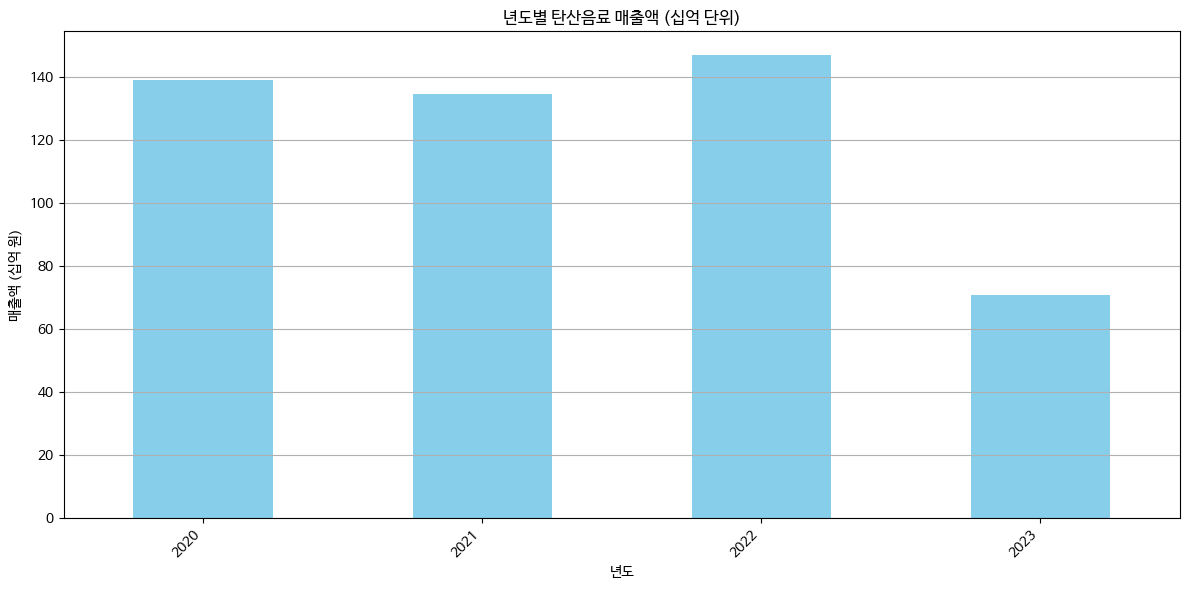

In [ ]:
# 년도별 매출액 계산 (억 단위)
yearly_sales_in_billion = Carbonated_merge_info.groupby('년도')['매출액'].sum() / 1e10

# 그래프 생성
plt.figure(figsize=(12,6))
yearly_sales_in_billion.plot(kind='bar', color='skyblue')

plt.title('년도별 탄산음료 매출액 (십억 단위)')
plt.xlabel('년도')
plt.ylabel('매출액 (십억 원)')
plt.grid(axis='y')

# x축의 레이블을 모두 표시합니다.
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


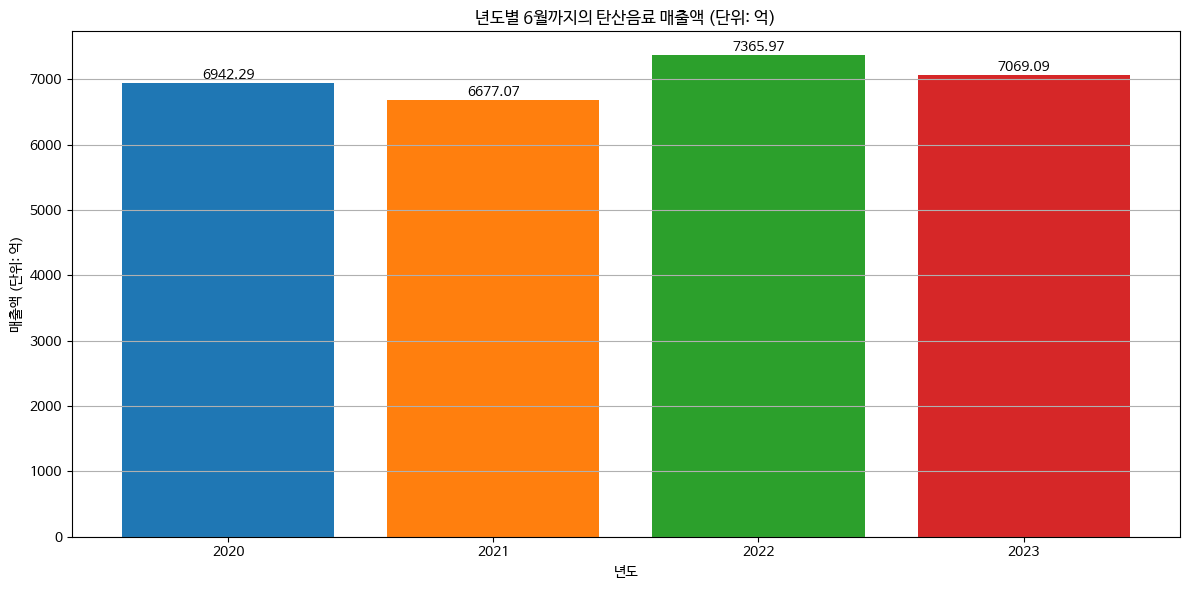

In [ ]:
filtered_2020 = Carbonated_merge_info[(Carbonated_merge_info['년도'] == '2020') & (Carbonated_merge_info['기간'] <= 'M202006')]
filtered_2021 = Carbonated_merge_info[(Carbonated_merge_info['년도'] == '2021') & (Carbonated_merge_info['기간'] <= 'M202106')]
filtered_2022 = Carbonated_merge_info[(Carbonated_merge_info['년도'] == '2022') & (Carbonated_merge_info['기간'] <= 'M202206')]
filtered_2023 = Carbonated_merge_info[(Carbonated_merge_info['년도'] == '2023') & (Carbonated_merge_info['기간'] <= 'M202306')]

# 각 년도의 6월까지의 매출 합계 (단위: 억)
sales_2020 = filtered_2020['매출액'].sum() / 1e8
sales_2021 = filtered_2021['매출액'].sum() / 1e8
sales_2022 = filtered_2022['매출액'].sum() / 1e8
sales_2023 = filtered_2023['매출액'].sum() / 1e8

# 그래프 생성
plt.figure(figsize=(12,6))
bars = plt.bar(['2020', '2021', '2022', '2023'],
               [sales_2020, sales_2021, sales_2022, sales_2023],
               color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

plt.title('년도별 6월까지의 탄산음료 매출액 (단위: 억)')
plt.xlabel('년도')
plt.ylabel('매출액 (단위: 억)')
plt.grid(axis='y')

# 막대에 수치 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()


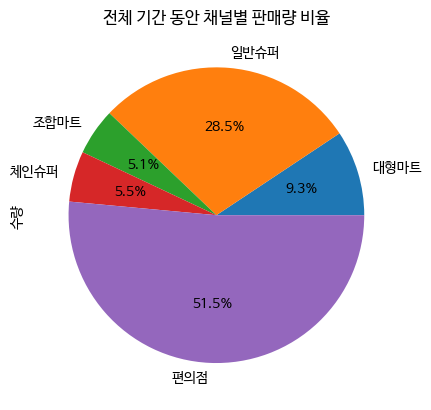

In [ ]:
# 1. 전체 기간 동안 채널별 판매량 비율
channel_sales = Carbonated_merge_info.groupby('채널')['수량'].sum()
channel_sales.plot(kind='pie', autopct='%1.1f%%')
plt.title("전체 기간 동안 채널별 판매량 비율")
plt.show()


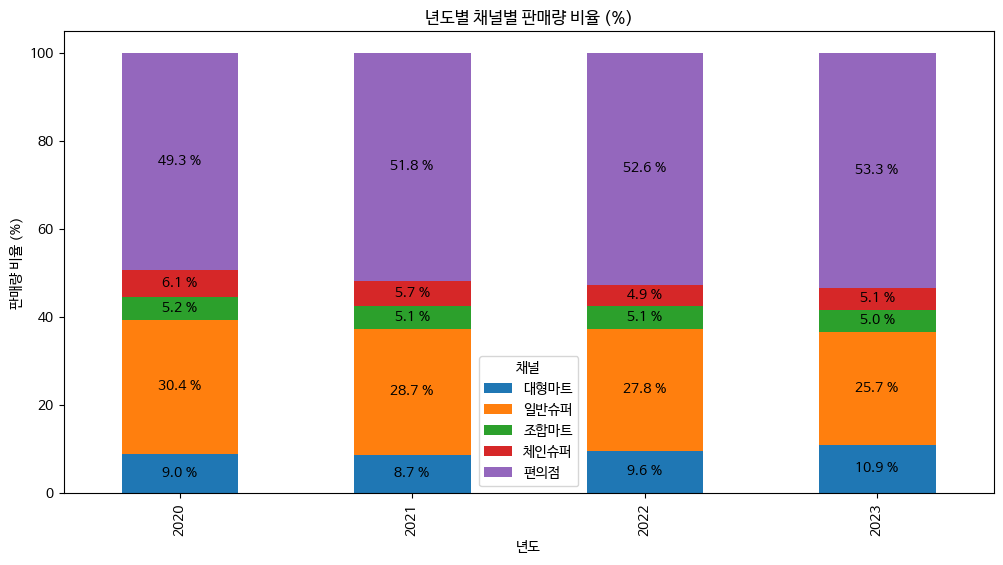

In [ ]:
yearly_channel_sales = Carbonated_merge_info.groupby(['년도', '채널'])['수량'].sum().unstack()
# 년도별 채널별 판매량을 %로 변환
yearly_total_sales = Carbonated_merge_info.groupby('년도')['수량'].sum()
yearly_channel_sales_percentage = yearly_channel_sales.divide(yearly_total_sales, axis=0) * 100

# 그래프 생성
ax = yearly_channel_sales_percentage.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("년도별 채널별 판매량 비율 (%)")
plt.ylabel("판매량 비율 (%)")

# 막대 그래프 안에 % 수치를 나타내기
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height != 0:
        ax.text(x+width/2,
                y+height/2,
                '{:.1f} %'.format(height),
                horizontalalignment='center',
                verticalalignment='center',
                )

plt.show()


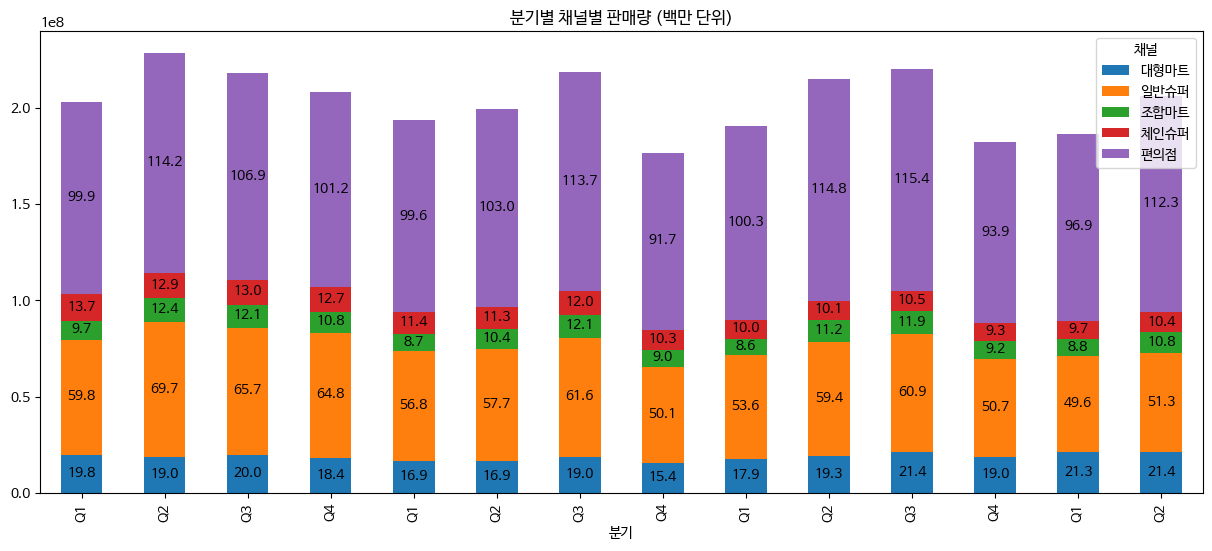

In [ ]:
# 분기별 채널별 판매량을 계산
quarterly_channel_sales = Carbonated_merge_info.groupby(['년도', '분기', '채널'])['수량'].sum().unstack().reset_index()
quarterly_channel_sales.drop(columns='년도', inplace=True)

# 그래프 생성
ax = quarterly_channel_sales.set_index('분기').plot(kind='bar', stacked=True, figsize=(15, 6))
plt.title("분기별 채널별 판매량 (백만 단위)")

# 막대 그래프 안에 수치를 나타내기
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height != 0:
        ax.text(x+width/2,
                y+height/2,
                '{:.1f}'.format(height/1000000),
                horizontalalignment='center',
                verticalalignment='center')

plt.show()


속성별 판매량

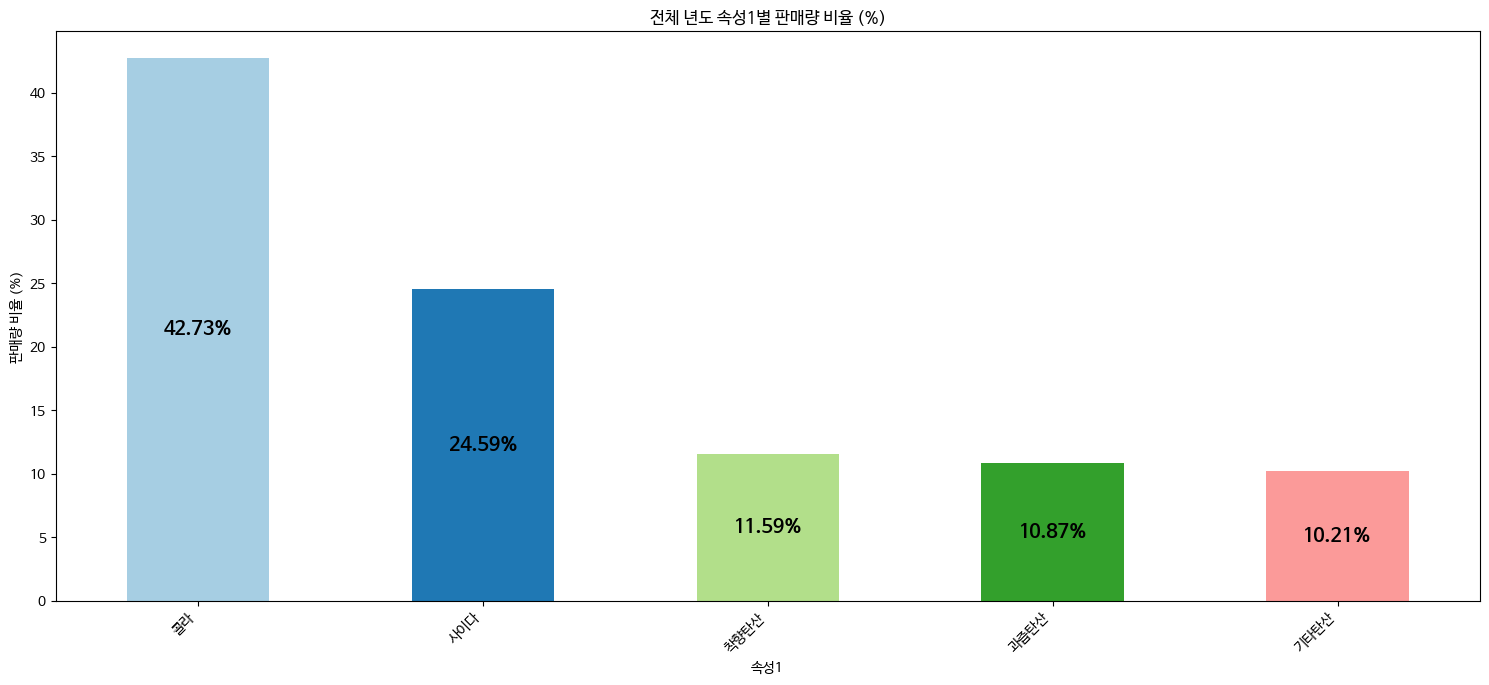

In [ ]:
# 전체 속성1 판매량 계산
total_attr_sales = Carbonated_merge_info.groupby('속성1')['수량'].sum()

# 판매량을 비율로 변환
total_sales_percentage = (total_attr_sales / total_attr_sales.sum()) * 100

# 다양한 색상 설정
colors = plt.cm.Paired(range(len(total_sales_percentage)))

# 그래프 생성
plt.figure(figsize=(15,7))
ax = total_sales_percentage.sort_values(ascending=False).plot(kind='bar', color=colors)
plt.title('전체 년도 속성1별 판매량 비율 (%)')
plt.ylabel('판매량 비율 (%)')
plt.xlabel('속성1')
plt.tight_layout()
plt.xticks(rotation=45, ha='right')

# 막대 그래프 안에 수치 표시
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=14,fontweight='bold')
plt.show()


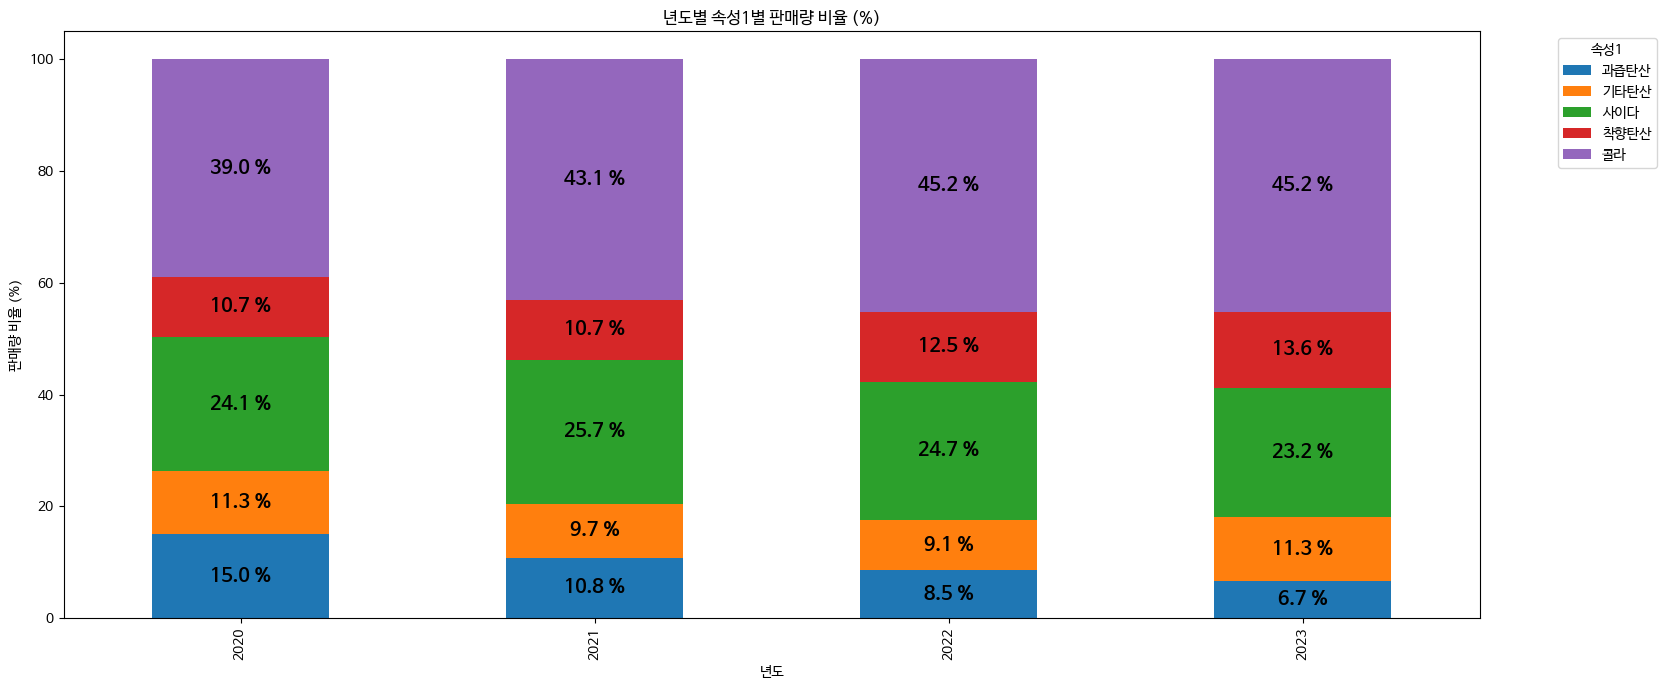

In [ ]:
# 년도별 속성1별 판매량 계산
yearly_attr_sales = Carbonated_merge_info.groupby(['년도', '속성1'])['수량'].sum().unstack()

# 년도별 판매량 비율로 변환
yearly_sales_total = yearly_attr_sales.sum(axis=1)
yearly_attr_sales_percentage = yearly_attr_sales.divide(yearly_sales_total, axis=0) * 100

# 그래프 생성
fig, ax = plt.subplots(figsize=(15,7))
yearly_attr_sales_percentage.plot(kind='bar', stacked=True, ax=ax)
plt.title('년도별 속성1별 판매량 비율 (%)')
plt.xlabel('년도')
plt.ylabel('판매량 비율 (%)')
plt.tight_layout()
plt.legend(title='속성1', bbox_to_anchor=(1.05, 1), loc='upper left')

# 그래프 안에 수치 표시
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width/2,
            y + height/2,
            '{:.1f} %'.format(height),
            horizontalalignment='center',
            verticalalignment='center',
            fontsize=14,
            fontweight='bold',
            color='black')
plt.show()


제로와 논제로

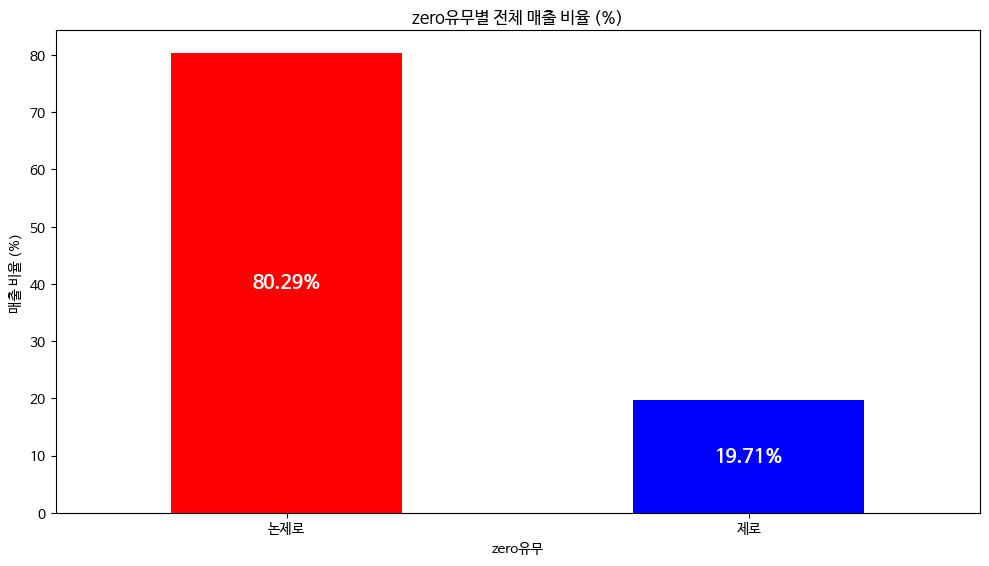

In [ ]:
# zero유무별 전체 매출 계산
total_zero_sales = Carbonated_merge_info.groupby('zero유무')['매출액'].sum()

# 전체 매출 중 zero유무별 매출의 비율을 계산
total_sales_percentage = (total_zero_sales / total_zero_sales.sum()) * 100

# 그래프 생성
plt.figure(figsize=(10,6))
ax = total_sales_percentage.sort_values(ascending=False).plot(kind='bar', color=['red', 'blue'])
plt.title('zero유무별 전체 매출 비율 (%)')
plt.ylabel('매출 비율 (%)')
plt.xlabel('zero유무')
plt.tight_layout()
plt.xticks(rotation=0)

# 막대 그래프 안에 수치 표시
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=14, color='white',fontweight='bold')

plt.show()


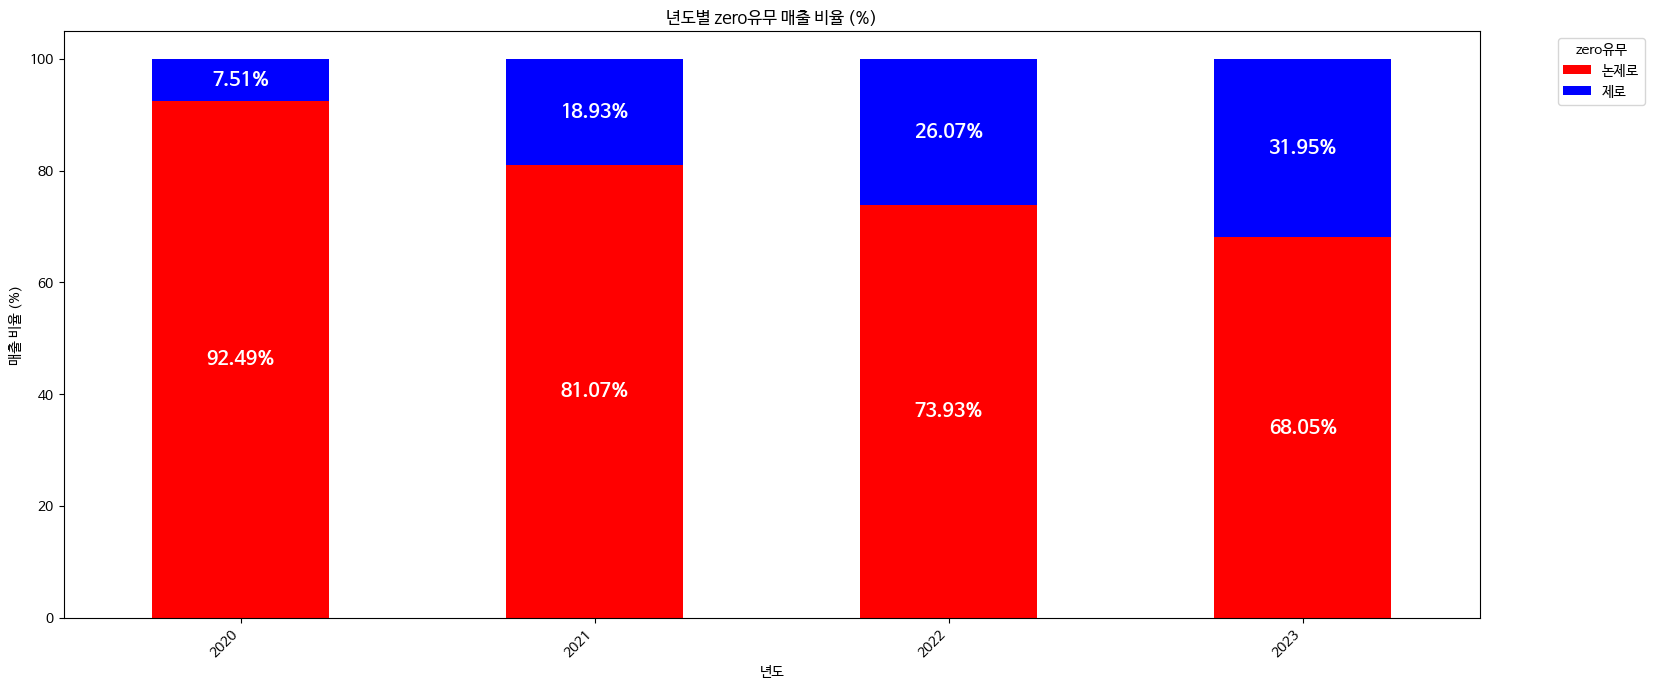

In [ ]:
# 년도와 zero유무별 매출 계산
yearly_zero_sales = Carbonated_merge_info.groupby(['년도', 'zero유무'])['매출액'].sum().unstack()

# 년도별 전체 매출을 사용하여 비율 계산
yearly_total_sales = yearly_zero_sales.sum(axis=1)
yearly_zero_sales_percentage = yearly_zero_sales.divide(yearly_total_sales, axis=0) * 100

# 그래프 생성
ax = yearly_zero_sales_percentage.plot(kind='bar', stacked=True, figsize=(15,7), color=['red', 'blue'])
plt.title('년도별 zero유무 매출 비율 (%)')
plt.ylabel('매출 비율 (%)')
plt.xlabel('년도')
plt.tight_layout()
plt.legend(title='zero유무', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')

# 막대 그래프 안에 수치를 중앙에 표시
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 5:
        ax.annotate(f'{height:.2f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=14, color='white',fontweight='bold')

plt.show()


속성별 제로 비중

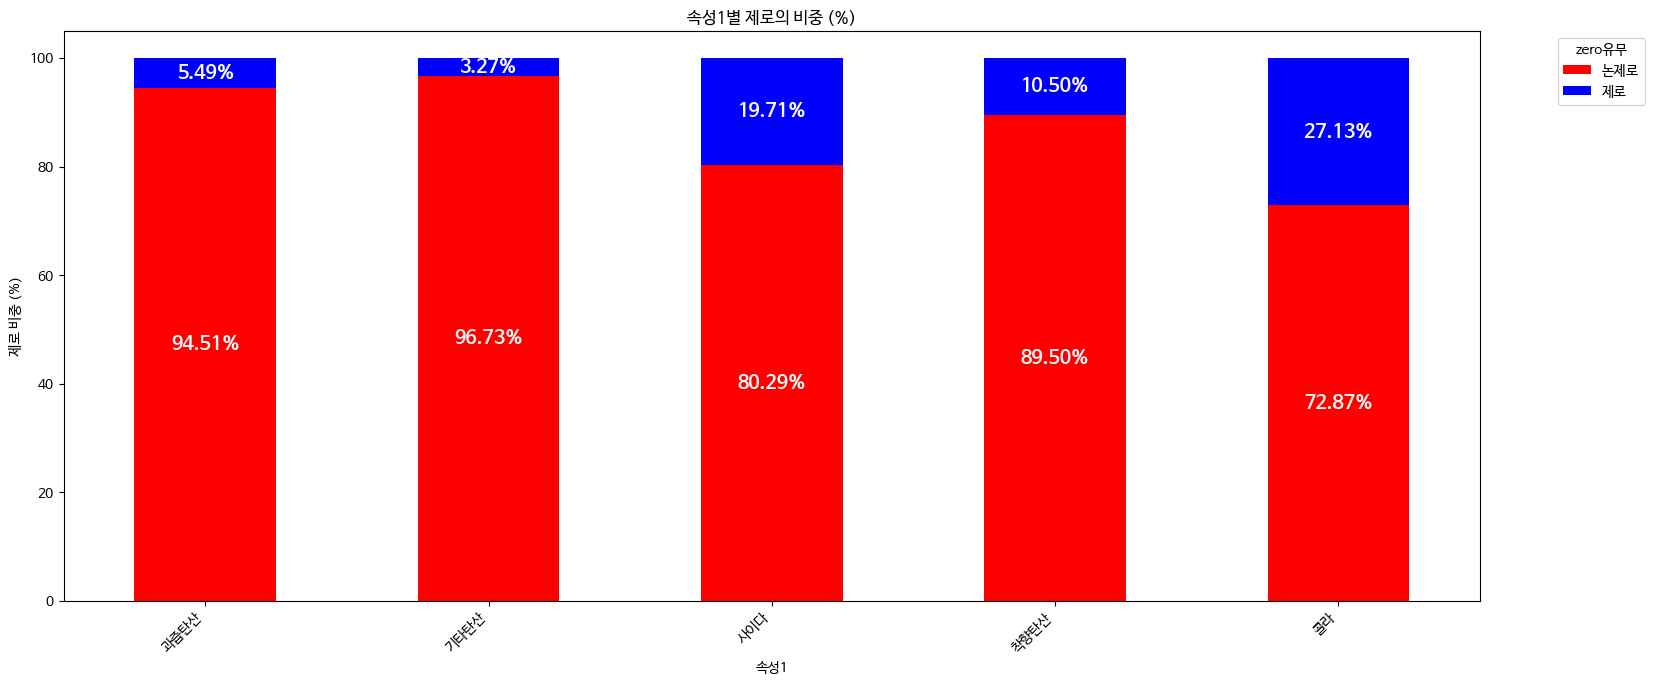

In [ ]:
# 속성1과 zero유무별 매출 계산
attr_zero_sales = Carbonated_merge_info.groupby(['속성1', 'zero유무'])['매출액'].sum().unstack()

# 속성1별 전체 매출을 사용하여 비율 계산
attr_total_sales = attr_zero_sales.sum(axis=1)
attr_zero_sales_percentage = attr_zero_sales.divide(attr_total_sales, axis=0) * 100

# 그래프 생성
ax = attr_zero_sales_percentage.plot(kind='bar', stacked=True, figsize=(15,7), color=['red', 'blue'])
plt.title('속성1별 제로의 비중 (%)')
plt.ylabel('제로 비중 (%)')
plt.xlabel('속성1')
plt.tight_layout()
plt.legend(title='zero유무', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')

# 막대 그래프 안에 수치 표시
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=14, color='white', fontweight='bold')

plt.show()


<Figure size 1500x700 with 0 Axes>

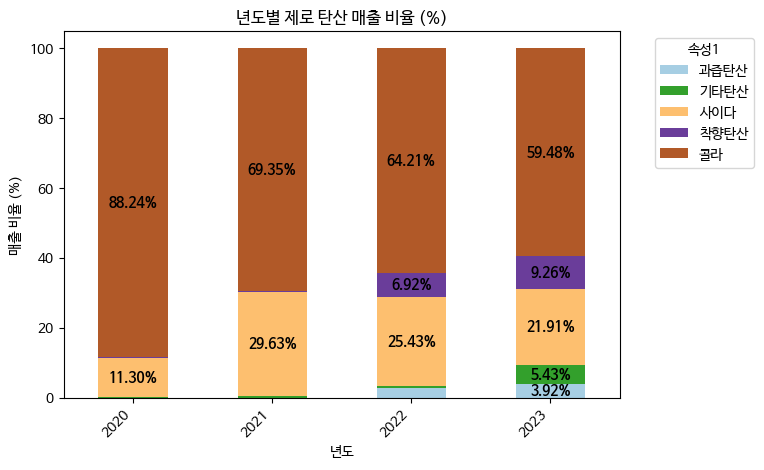

<Figure size 1500x700 with 0 Axes>

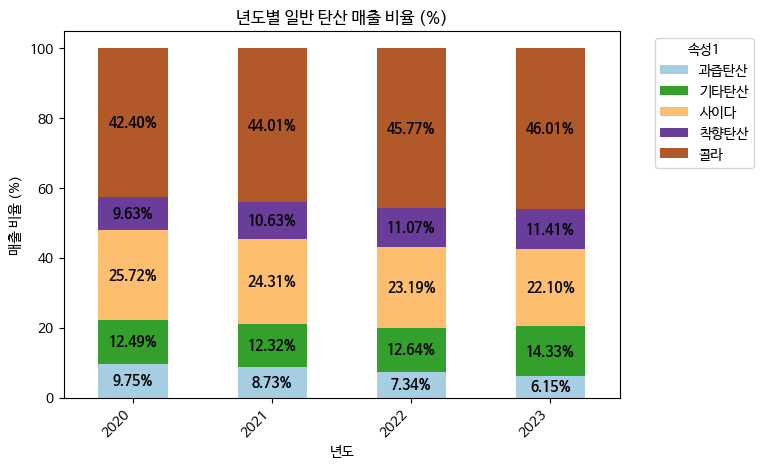

In [ ]:
# '제로'와 '논제로'의 매출액을 각 년도의 전체 매출액으로 나눠서 비율로 변환
zero_sales = Carbonated_merge_info[Carbonated_merge_info['zero유무'] == '제로'].groupby(['년도', '속성1'])['매출액'].sum().unstack()
non_zero_sales = Carbonated_merge_info[Carbonated_merge_info['zero유무'] == '논제로'].groupby(['년도', '속성1'])['매출액'].sum().unstack()

zero_sales_percentage = zero_sales.divide(zero_sales.sum(axis=1), axis=0) * 100
non_zero_sales_percentage = non_zero_sales.divide(non_zero_sales.sum(axis=1), axis=0) * 100

# 색상 팔레트 설정
colors = plt.cm.Paired(np.linspace(0,1, len(zero_sales.columns)))

# '제로'에 대한 그래프 생성
plt.figure(figsize=(15,7))
ax1 = zero_sales_percentage.plot(kind='bar', stacked=True, color=colors)
plt.title('년도별 제로 탄산 매출 비율 (%)')
plt.ylabel('매출 비율 (%)')
plt.xlabel('년도')
plt.tight_layout()
plt.legend(title='속성1', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')

# 막대 그래프 안에 수치 표시
for p in ax1.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    #3% 이상만 수치값 표시하기 그래프에서
    if height >= 3:
        ax1.annotate(f'{height:.2f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=10, fontweight='bold')

# '논제로'에 대한 그래프 생성
plt.figure(figsize=(15,7))
ax2 = non_zero_sales_percentage.plot(kind='bar', stacked=True, color=colors)
plt.title('년도별 일반 탄산 매출 비율 (%)')
plt.ylabel('매출 비율 (%)')
plt.xlabel('년도')
plt.tight_layout()
plt.legend(title='속성1', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')

# 막대 그래프 안에 수치 표시
for p in ax2.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height >= 3:
        ax2.annotate(f'{height:.2f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=10, fontweight='bold')

plt.show()


제로,논제로 구매비율 증가율 6월기준 데이터 100억 단위

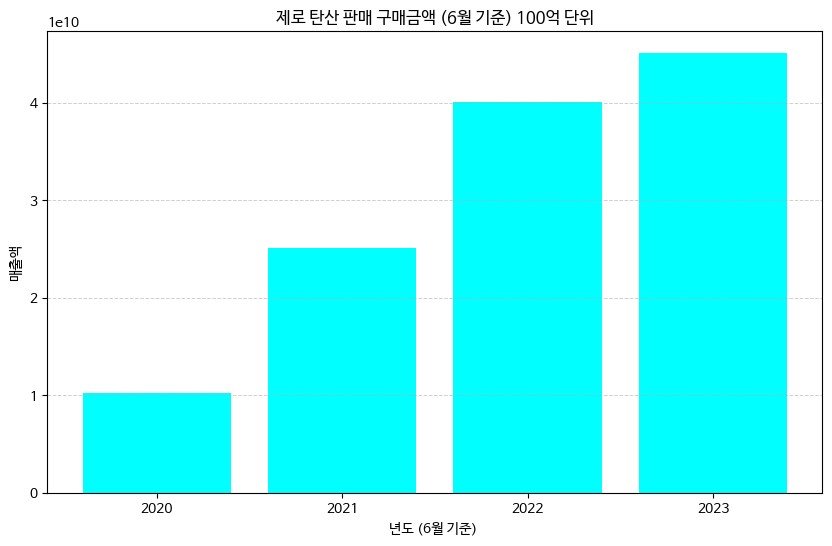

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

filtered_2020_june = Carbonated_merge_info[(Carbonated_merge_info['기간'] == 'M202006')]
filtered_2021_june = Carbonated_merge_info[(Carbonated_merge_info['기간'] == 'M202106')]
filtered_2022_june = Carbonated_merge_info[(Carbonated_merge_info['기간'] == 'M202206')]
filtered_2023_june = Carbonated_merge_info[(Carbonated_merge_info['기간'] == 'M202306')]

# 각 년도별 6월 제로 판매 구매금액 계산
filtered_data_list = [filtered_2020_june, filtered_2021_june, filtered_2022_june, filtered_2023_june]
zero_sales_june = {}

for year, data in zip(['2020', '2021', '2022', '2023'], filtered_data_list):
    zero_sales_june[year] = data[data['zero유무'] == '제로']['매출액'].sum()

# 그래프 시각화
plt.figure(figsize=(10,6))

years = list(zero_sales_june.keys())
plt.bar(years, list(zero_sales_june.values()), color='cyan')

plt.title('제로 탄산 판매 구매금액 (6월 기준) 100억 단위')
plt.xlabel('년도 (6월 기준) ')
plt.ylabel('매출액')
plt.grid(True, axis='y', linestyle='--', linewidth=0.7, alpha=0.6)
plt.show()


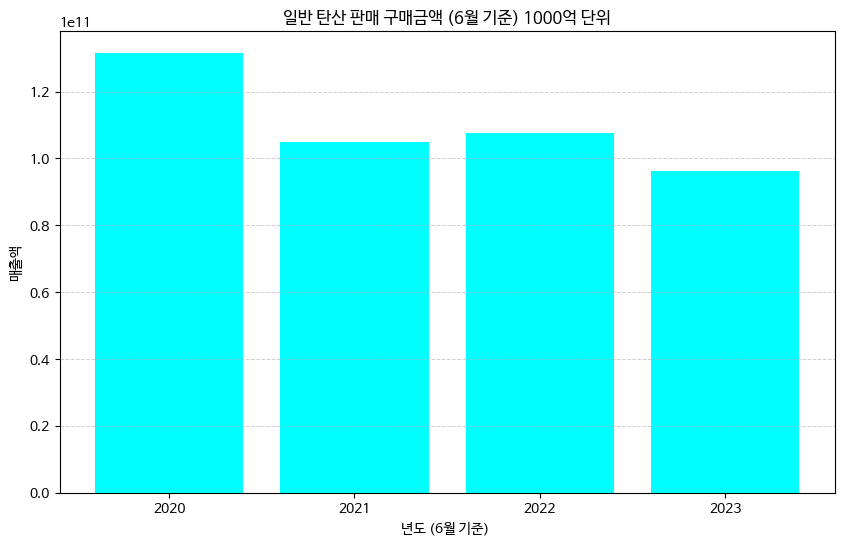

In [ ]:
filtered_2020_june = Carbonated_merge_info[(Carbonated_merge_info['기간'] == 'M202006')]
filtered_2021_june = Carbonated_merge_info[(Carbonated_merge_info['기간'] == 'M202106')]
filtered_2022_june = Carbonated_merge_info[(Carbonated_merge_info['기간'] == 'M202206')]
filtered_2023_june = Carbonated_merge_info[(Carbonated_merge_info['기간'] == 'M202306')]

# 각 년도별 6월 제로 판매 구매금액 계산
filtered_data_list = [filtered_2020_june, filtered_2021_june, filtered_2022_june, filtered_2023_june]
zero_sales_june = {}

for year, data in zip(['2020', '2021', '2022', '2023'], filtered_data_list):
    zero_sales_june[year] = data[data['zero유무'] == '논제로']['매출액'].sum()

# 그래프 시각화
plt.figure(figsize=(10,6))

years = list(zero_sales_june.keys())
plt.bar(years, list(zero_sales_june.values()), color='cyan')

plt.title('일반 탄산 판매 구매금액 (6월 기준) 1000억 단위')
plt.xlabel('년도 (6월 기준) ')
plt.ylabel('매출액')
plt.grid(True, axis='y', linestyle='--', linewidth=0.7, alpha=0.6)
plt.show()


제조사별 매출 순서

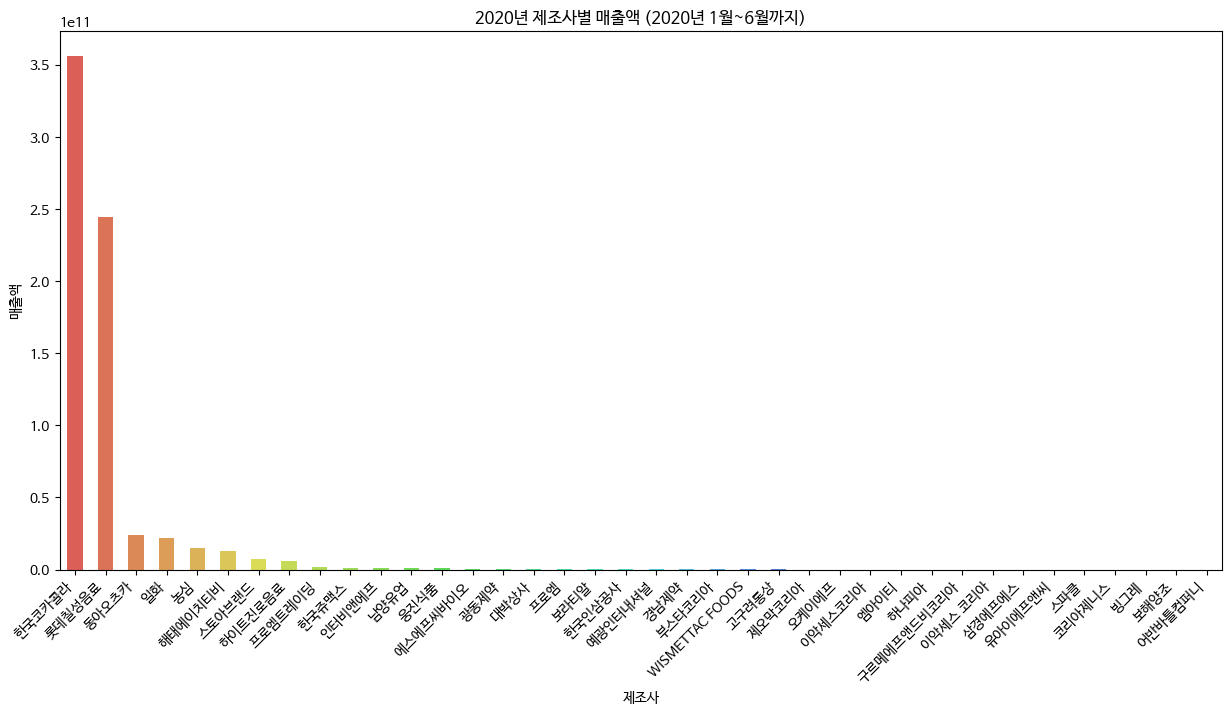

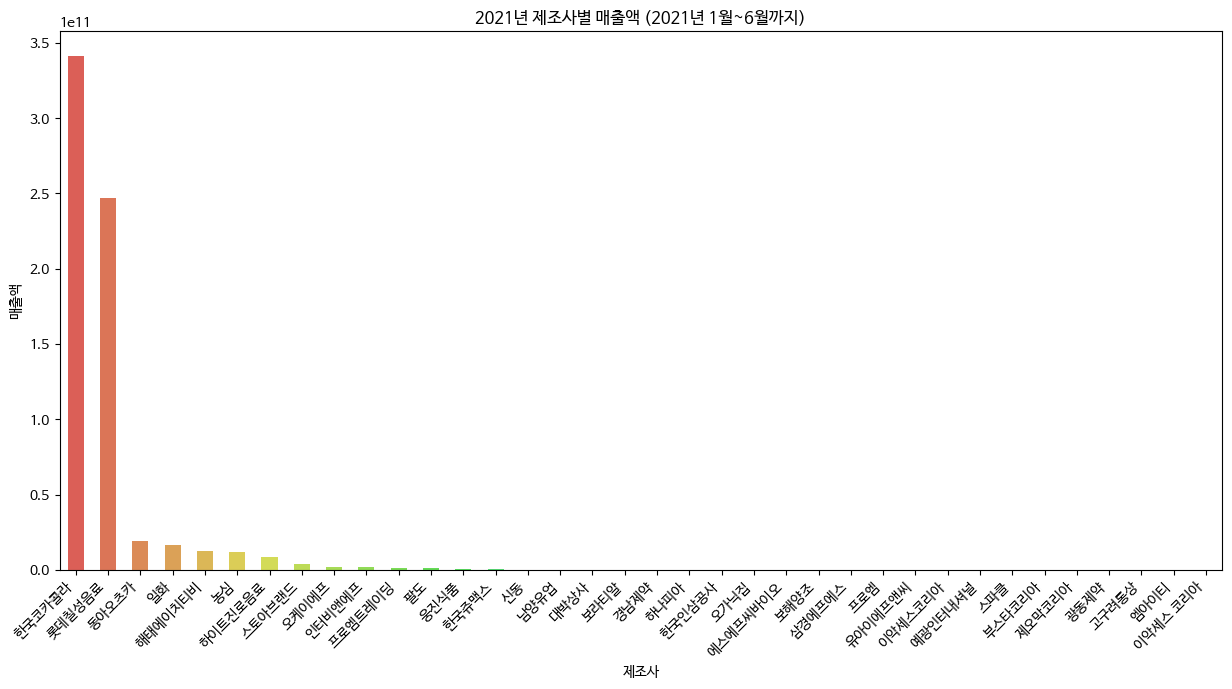

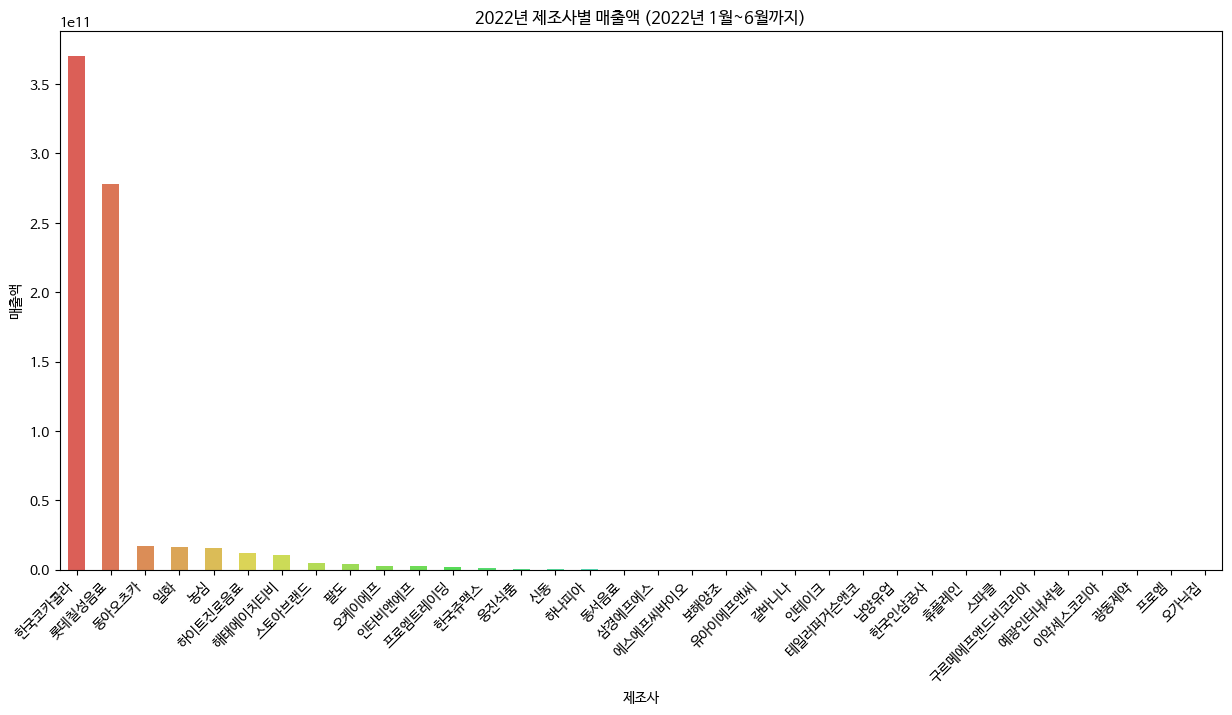

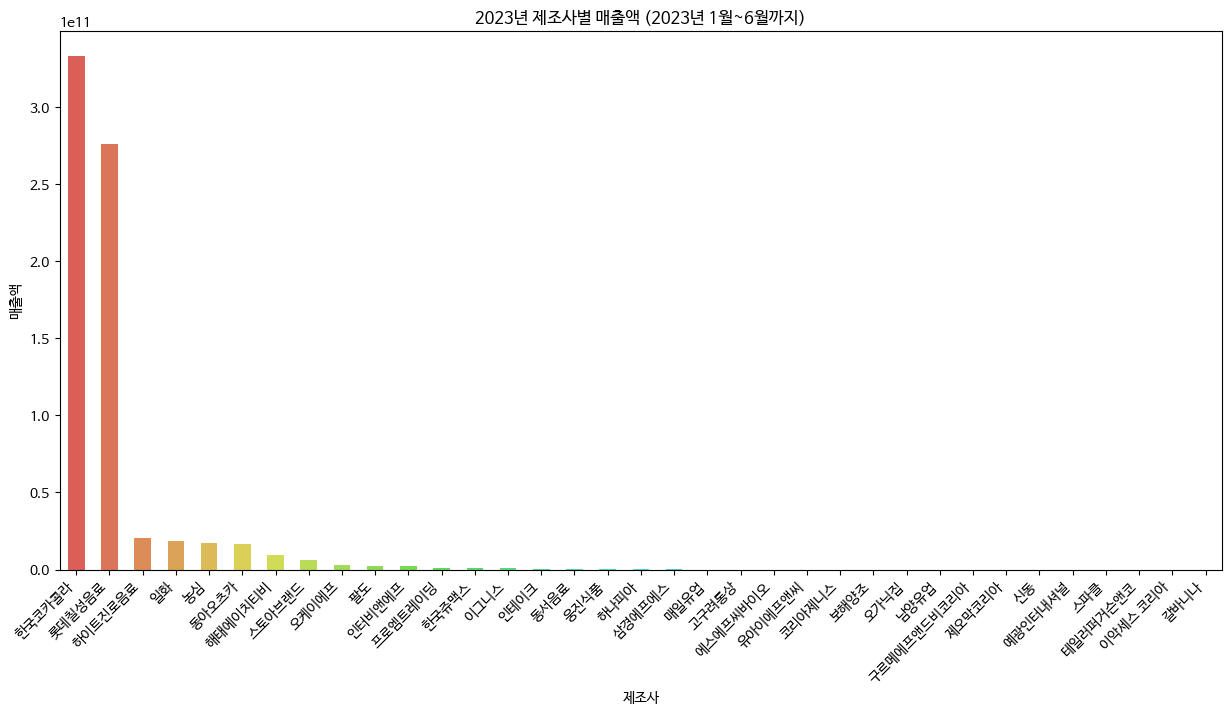

In [ ]:
years = ['2020', '2021', '2022', '2023']
filtered_years = [filtered_2020, filtered_2021, filtered_2022, filtered_2023]

for year, filtered_data in zip(years, filtered_years):
    manufacturer_yearly_sales = filtered_data.groupby('MANUFACTURER 검증')['매출액'].sum()

    # 랜덤 색깔 생성
    num_manufacturers = len(manufacturer_yearly_sales)
    colors_list = plt.cm.jet(np.linspace(0, 1, num_manufacturers))
    colors = sns.color_palette('hls',num_manufacturers) ## 색상 지정
    # 그래프 생성
    plt.figure(figsize=(15,7))
    manufacturer_yearly_sales.sort_values(ascending=False).plot(kind='bar', color=colors)
    plt.title(f'{year}년 제조사별 매출액 ({year}년 1월~6월까지)')
    plt.ylabel('매출액')
    plt.xlabel('제조사')
    plt.xticks(rotation=45, ha='right')
    plt.show()


제조사별 수량 순서

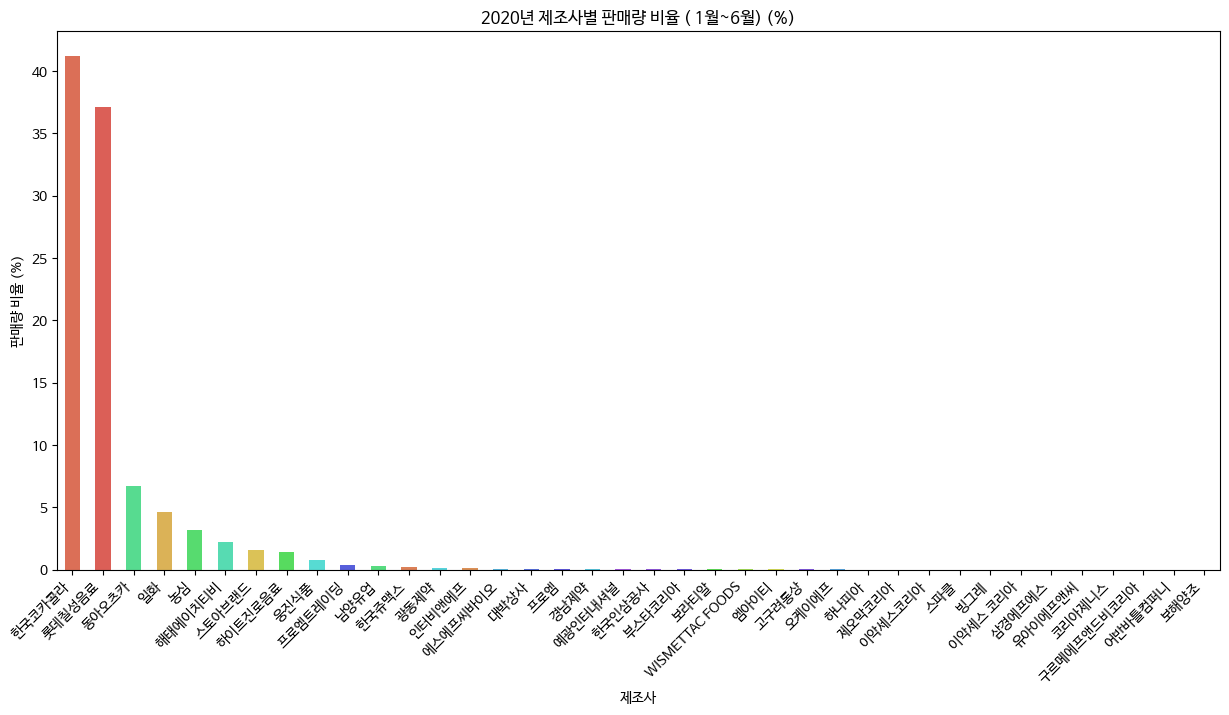

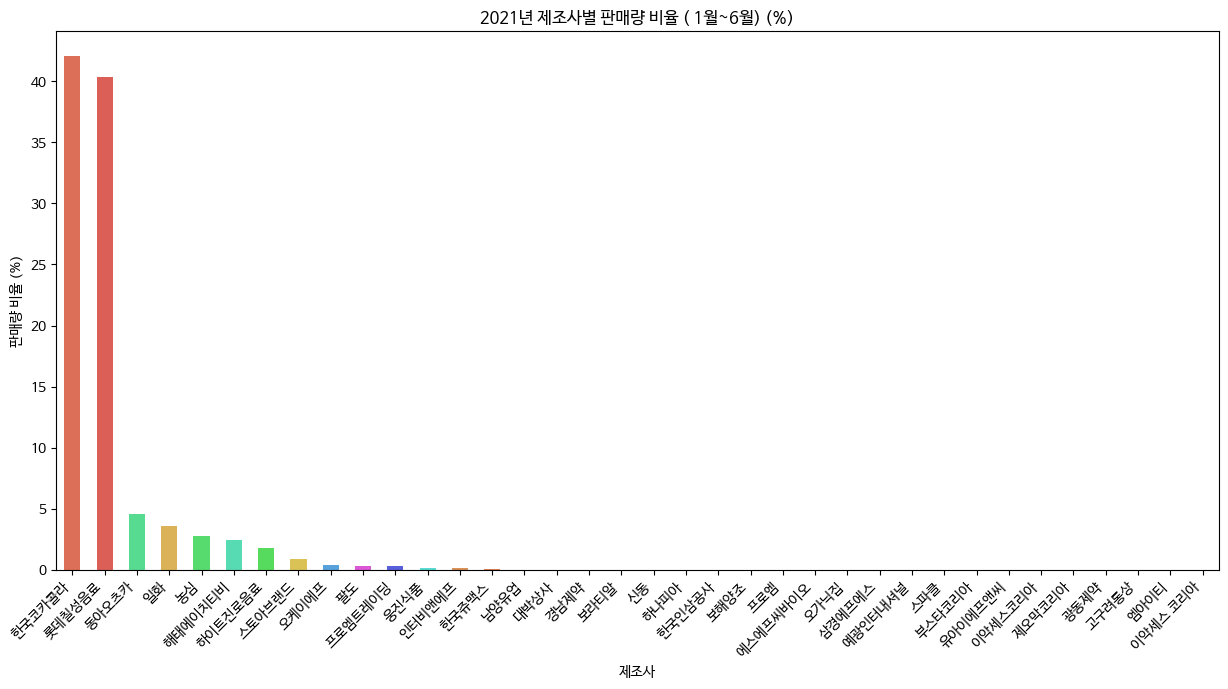

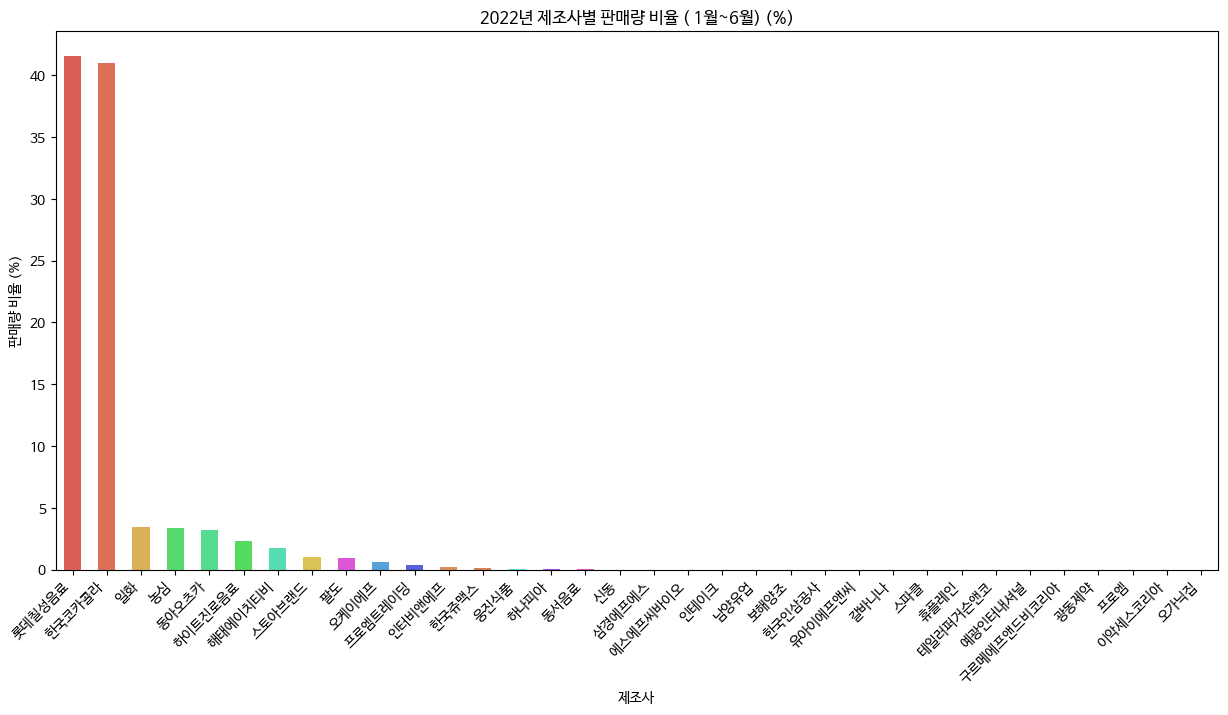

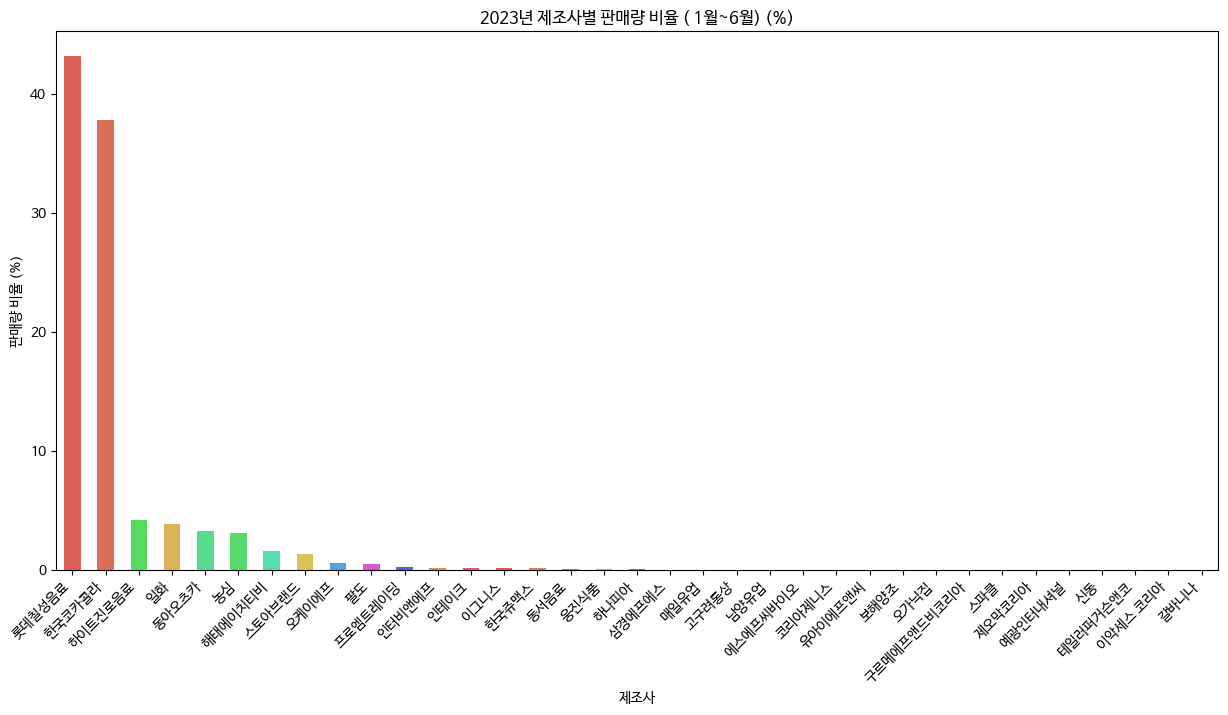

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 제조사에 대해 고정된 색상 할당
all_manufacturers = pd.concat(filtered_years)['MANUFACTURER 검증'].unique()
colors_palette = sns.color_palette('hls', len(all_manufacturers))
manufacturer_to_color = dict(zip(all_manufacturers, colors_palette))

years = ['2020', '2021', '2022', '2023']

for year, filtered_data in zip(years, filtered_years):
    total_quantity = filtered_data['수량'].sum()
    manufacturer_yearly_sales = (filtered_data.groupby('MANUFACTURER 검증')['수량'].sum() / total_quantity) * 100

    # 제조사별 색상 고정
    sorted_manufacturers = manufacturer_yearly_sales.sort_values(ascending=False).index
    colors = [manufacturer_to_color[manufacturer] for manufacturer in sorted_manufacturers]

    # 그래프 생성
    plt.figure(figsize=(15,7))
    manufacturer_yearly_sales.sort_values(ascending=False).plot(kind='bar', color=colors)
    plt.title(f'{year}년 제조사별 판매량 비율 ( 1월~6월) (%)')
    plt.ylabel('판매량 비율 (%)')
    plt.xlabel('제조사')
    plt.xticks(rotation=45, ha='right')
    plt.show()


한국코카콜라

<Figure size 1500x700 with 0 Axes>

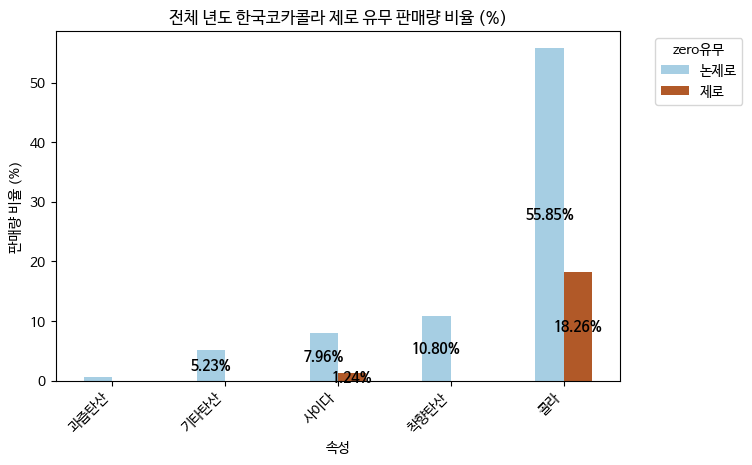

In [ ]:
# '한국코카콜라'
cocacola_sales = Carbonated_merge_info[Carbonated_merge_info['MANUFACTURER 검증'] == '한국코카콜라']

# 속성1 및 zero유무 별 판매량
cocacola_attr_zero_sales = cocacola_sales.groupby(['속성1', 'zero유무'])['매출액'].sum().unstack()

# 판매량을 비율로 전환
cocacola_sales_percentage = cocacola_attr_zero_sales.divide(cocacola_attr_zero_sales.sum().sum()) * 100

# 그래프
colors = plt.cm.Paired(np.linspace(0,1, len(cocacola_sales_percentage.columns)))
plt.figure(figsize=(15,7))
ax = cocacola_sales_percentage.plot(kind='bar', stacked=False, color=colors)
plt.title('전체 년도 한국코카콜라 제로 유무 판매량 비율 (%)')
plt.ylabel('판매량 비율 (%)')
plt.xlabel('속성')
plt.tight_layout()
plt.legend(title='zero유무', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')

# 그래프 안에 수치
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height >= 1:
        ax.annotate(f'{height:.2f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=10, color='black', fontweight='bold')

plt.show()


<Figure size 1500x700 with 0 Axes>

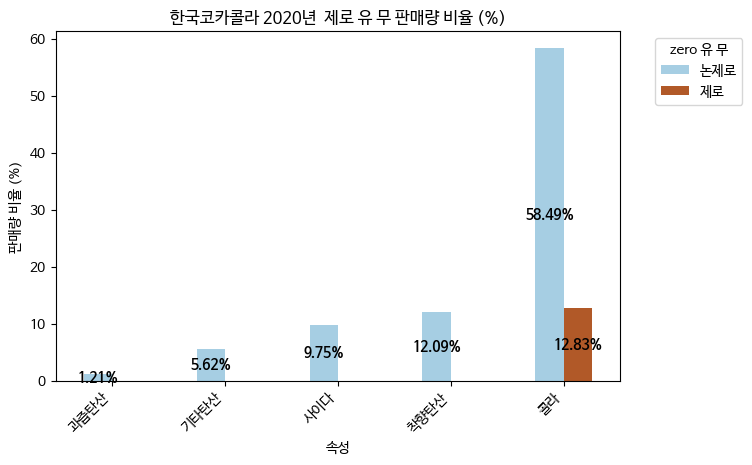

<Figure size 1500x700 with 0 Axes>

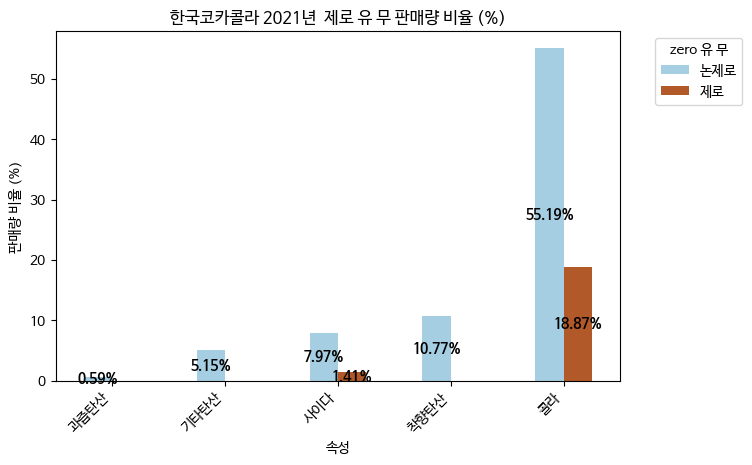

<Figure size 1500x700 with 0 Axes>

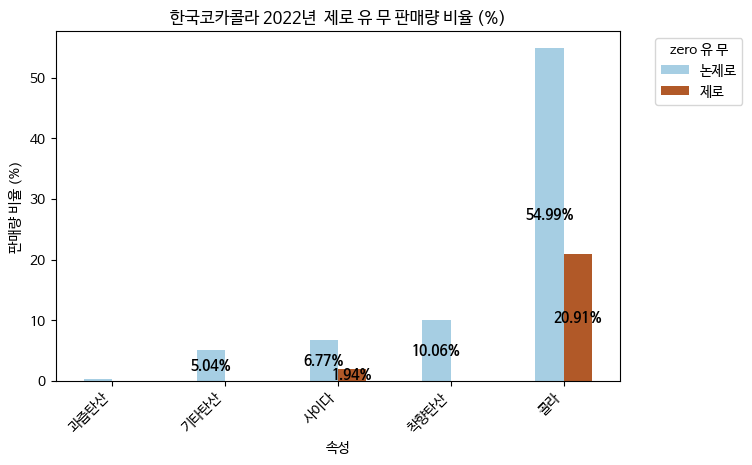

<Figure size 1500x700 with 0 Axes>

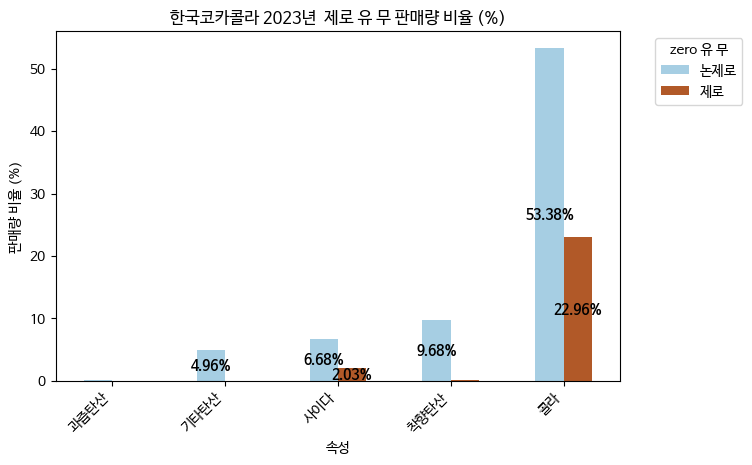

In [ ]:
# '한국코카콜라'
cocacola_sales = Carbonated_merge_info[Carbonated_merge_info['MANUFACTURER 검증'] == '한국코카콜라']

# 연도, 속성1 및 zero유무 별 판매량 계산
cocacola_yearly_attr_zero_sales = cocacola_sales.groupby(['년도', '속성1', 'zero유무'])['매출액'].sum().unstack()

# 각 연도별로 그래프
years = cocacola_yearly_attr_zero_sales.index.get_level_values('년도').unique()
colors = plt.cm.Paired(np.linspace(0,1, cocacola_yearly_attr_zero_sales.columns.size))

for year in years:
    # 해당 연도의 판매량을 기준으로 100분율
    yearly_percentage = cocacola_yearly_attr_zero_sales.loc[year].divide(cocacola_yearly_attr_zero_sales.loc[year].sum().sum()) * 100

    plt.figure(figsize=(15,7))
    ax = yearly_percentage.plot(kind='bar', stacked=False, color=colors)
    plt.title(f'한국코카콜라 {year}년  제로 유 무 판매량 비율 (%)')
    plt.ylabel('판매량 비율 (%)')
    plt.xlabel('속성')
    plt.tight_layout()
    plt.legend(title='zero 유 무', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45, ha='right')

    # 그래프 안에 수치 데이터 표시
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        if height >= 0.5:
            ax.annotate(f'{height:.2f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=10, color='black', fontweight='bold')

    plt.show()


롯데 칠성음료

<Figure size 1500x700 with 0 Axes>

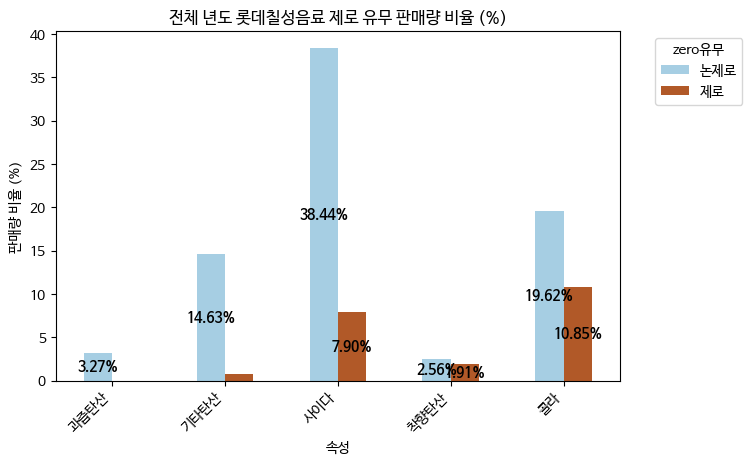

In [ ]:
# '롯데칠성음료'
cocacola_sales = Carbonated_merge_info[Carbonated_merge_info['MANUFACTURER 검증'] == '롯데칠성음료']

# 속성1 및 zero유무 별 판매량
cocacola_attr_zero_sales = cocacola_sales.groupby(['속성1', 'zero유무'])['매출액'].sum().unstack()

# 판매량을 비율로 전환
cocacola_sales_percentage = cocacola_attr_zero_sales.divide(cocacola_attr_zero_sales.sum().sum()) * 100

# 그래프
colors = plt.cm.Paired(np.linspace(0,1, len(cocacola_sales_percentage.columns)))
plt.figure(figsize=(15,7))
ax = cocacola_sales_percentage.plot(kind='bar', stacked=False, color=colors)
plt.title('전체 년도 롯데칠성음료 제로 유무 판매량 비율 (%)')
plt.ylabel('판매량 비율 (%)')
plt.xlabel('속성')
plt.tight_layout()
plt.legend(title='zero유무', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')

# 그래프 안에 수치
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height >= 1:
        ax.annotate(f'{height:.2f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=10, color='black', fontweight='bold')

plt.show()


<Figure size 1500x700 with 0 Axes>

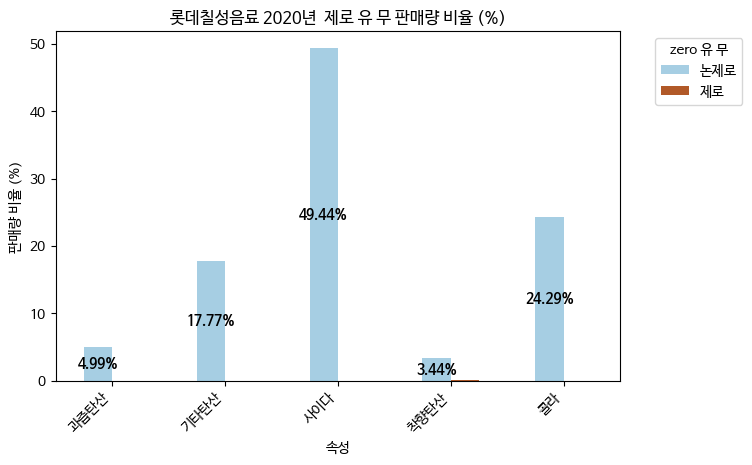

<Figure size 1500x700 with 0 Axes>

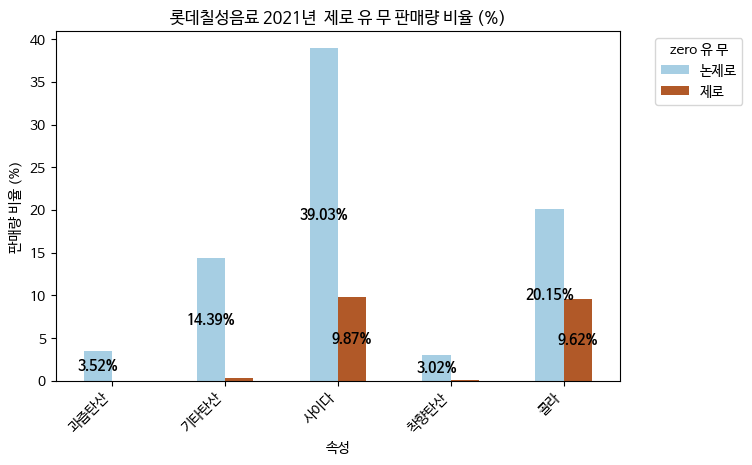

<Figure size 1500x700 with 0 Axes>

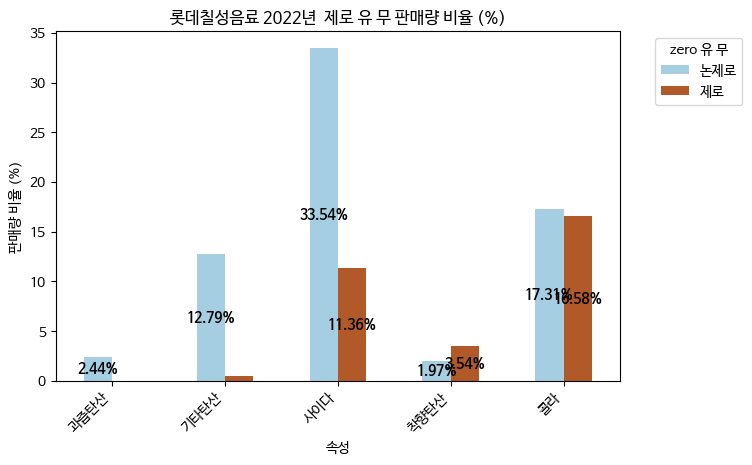

<Figure size 1500x700 with 0 Axes>

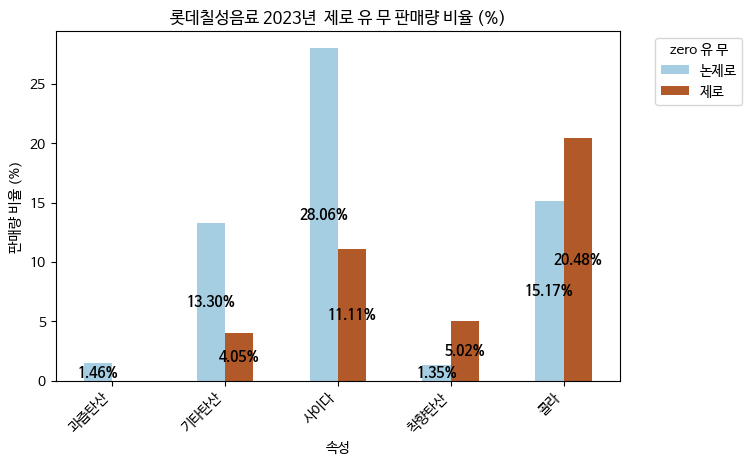

In [ ]:
# '롯데칠성음료'
cocacola_sales = Carbonated_merge_info[Carbonated_merge_info['MANUFACTURER 검증'] == '롯데칠성음료']

# 연도, 속성1 및 zero유무 별 판매량 계산
cocacola_yearly_attr_zero_sales = cocacola_sales.groupby(['년도', '속성1', 'zero유무'])['매출액'].sum().unstack()

# 각 연도별로 그래프
years = cocacola_yearly_attr_zero_sales.index.get_level_values('년도').unique()
colors = plt.cm.Paired(np.linspace(0,1, cocacola_yearly_attr_zero_sales.columns.size))

for year in years:
    # 해당 연도의 판매량을 기준으로 100분율
    yearly_percentage = cocacola_yearly_attr_zero_sales.loc[year].divide(cocacola_yearly_attr_zero_sales.loc[year].sum().sum()) * 100

    plt.figure(figsize=(15,7))
    ax = yearly_percentage.plot(kind='bar', stacked=False, color=colors)
    plt.title(f'롯데칠성음료 {year}년  제로 유 무 판매량 비율 (%)')
    plt.ylabel('판매량 비율 (%)')
    plt.xlabel('속성')
    plt.tight_layout()
    plt.legend(title='zero 유 무', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45, ha='right')

    # 그래프 안에 수치 데이터 표시
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        if height >= 0.5:
            ax.annotate(f'{height:.2f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=10, color='black', fontweight='bold')

    plt.show()


#MAT 출력하기



*   속성1에 대한 MAT




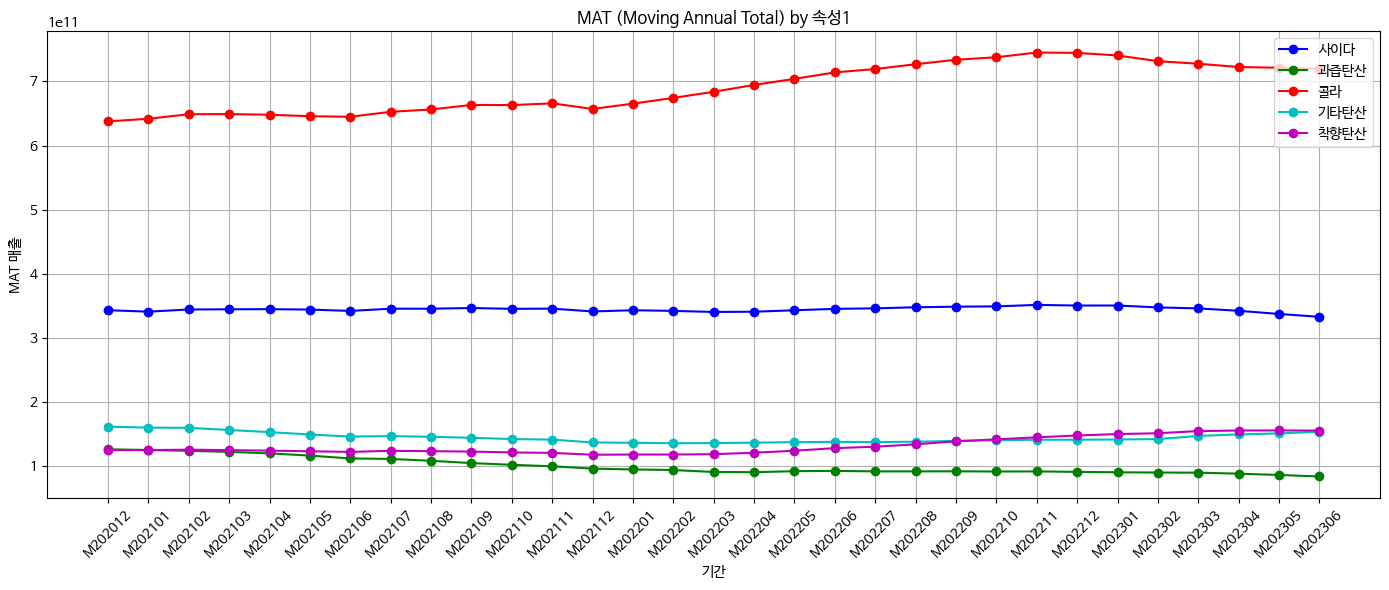

In [ ]:
# '기간' 칼럼을 이용해 데이터 정렬
Carbonated_merge_info = Carbonated_merge_info.sort_values(by='기간')

# MAT 계산 함수
def calculate_MAT(df, start_idx):
    return df.iloc[start_idx:start_idx+12]['매출액'].sum()

# 그래프 그리기 준비
plt.figure(figsize=(14, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y']

# 속성1의 각 값을 기반으로 MAT 계산 및 그래프 그리기
for index, attr in enumerate(Carbonated_merge_info['속성1'].unique()):
    # 해당 속성1의 데이터만 필터링
    attr_data = Carbonated_merge_info[Carbonated_merge_info['속성1'] == attr]
    # 해당 속성1에 대한 매출액 합산
    grouped_sales = attr_data.groupby('기간')['매출액'].sum().reset_index()
    # 각 기간에 대한 MAT 계산
    MAT_values = [calculate_MAT(grouped_sales, i) for i in range(len(grouped_sales) - 11)]
    # 그래프 그리기
    plt.plot(grouped_sales['기간'][11:], MAT_values, marker='o', color=colors[index], label=attr)

plt.xticks(rotation=45)
plt.title('MAT (Moving Annual Total) by 속성1')
plt.xlabel('기간')
plt.ylabel('MAT 매출')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


* zero 유무

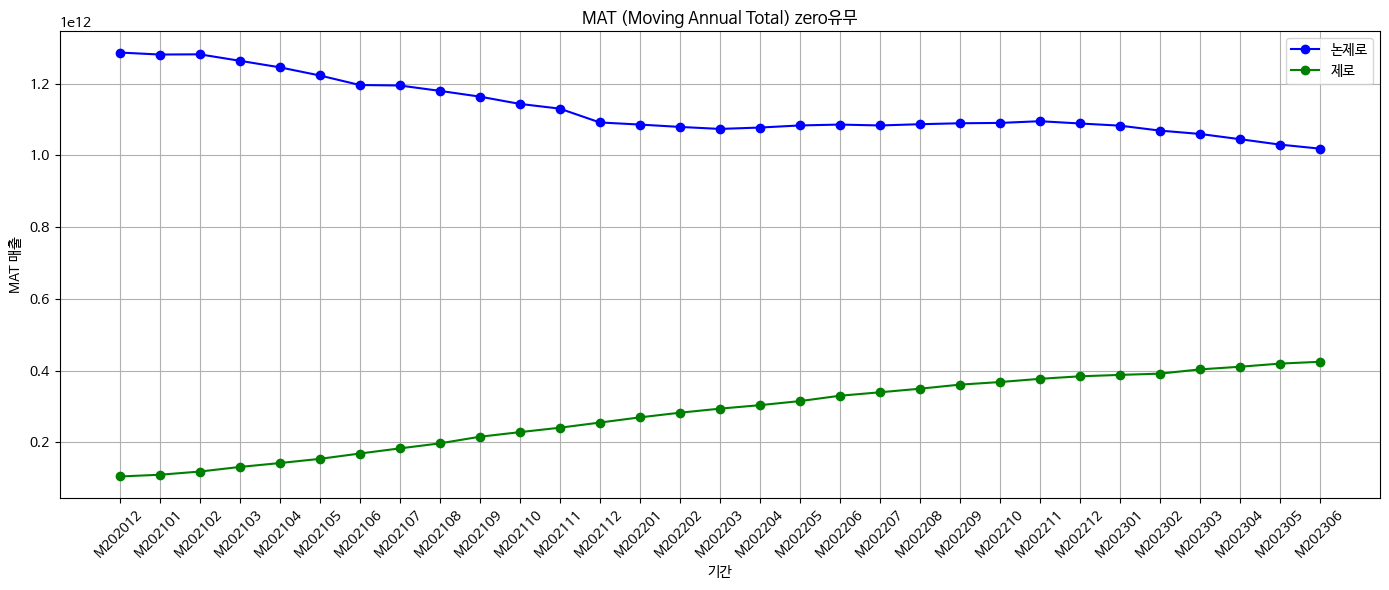

In [ ]:
# '기간' 칼럼을 이용해 데이터 정렬
Carbonated_merge_info = Carbonated_merge_info.sort_values(by='기간')

# MAT 계산 함수
def calculate_MAT(df, start_idx):
    return df.iloc[start_idx:start_idx+12]['매출액'].sum()

# 그래프 그리기 준비
plt.figure(figsize=(14, 6))
colors = ['b', 'g']

# 속성1의 각 값을 기반으로 MAT 계산 및 그래프 그리기
for index, attr in enumerate(Carbonated_merge_info['zero유무'].unique()):
    # 해당 속성1의 데이터만 필터링
    attr_data = Carbonated_merge_info[Carbonated_merge_info['zero유무'] == attr]
    # 해당 속성1에 대한 매출액 합산
    grouped_sales = attr_data.groupby('기간')['매출액'].sum().reset_index()
    # 각 기간에 대한 MAT 계산
    MAT_values = [calculate_MAT(grouped_sales, i) for i in range(len(grouped_sales) - 11)]
    # 그래프 그리기
    plt.plot(grouped_sales['기간'][11:], MAT_values, marker='o', color=colors[index], label=attr)

plt.xticks(rotation=45)
plt.title('MAT (Moving Annual Total) zero유무')
plt.xlabel('기간')
plt.ylabel('MAT 매출')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# 롯데칠성음료 MAT

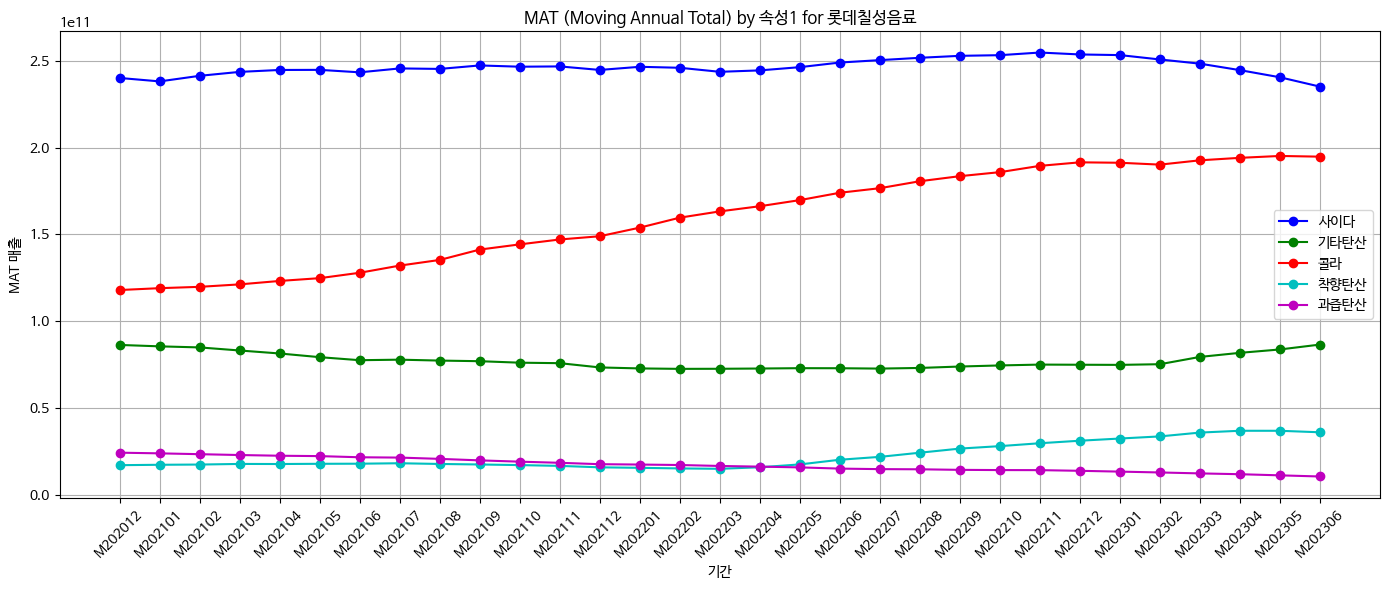

In [ ]:
# '기간' 칼럼을 이용해 데이터 정렬
Carbonated_merge_info = Carbonated_merge_info.sort_values(by='기간')

# 롯데칠성음료를 기준으로 데이터 필터링
lotte_data = Carbonated_merge_info[Carbonated_merge_info['MANUFACTURER 검증'] == '롯데칠성음료']

# MAT 계산 함수
def calculate_MAT(df, start_idx):
    return df.iloc[start_idx:start_idx+12]['매출액'].sum()

# 그래프 그리기 준비
plt.figure(figsize=(14, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y']

# 속성1의 각 값을 기반으로 MAT 계산 및 그래프 그리기
for index, attr in enumerate(lotte_data['속성1'].unique()):
    # 해당 속성1의 데이터만 필터링
    attr_data = lotte_data[lotte_data['속성1'] == attr]
    # 해당 속성1에 대한 매출액 합산
    grouped_sales = attr_data.groupby('기간')['매출액'].sum().reset_index()
    # 각 기간에 대한 MAT 계산
    MAT_values = [calculate_MAT(grouped_sales, i) for i in range(len(grouped_sales) - 11)]
    # 그래프 그리기
    plt.plot(grouped_sales['기간'][11:], MAT_values, marker='o', color=colors[index], label=attr)

plt.xticks(rotation=45)
plt.title('MAT (Moving Annual Total) by 속성1 for 롯데칠성음료')
plt.xlabel('기간')
plt.ylabel('MAT 매출')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


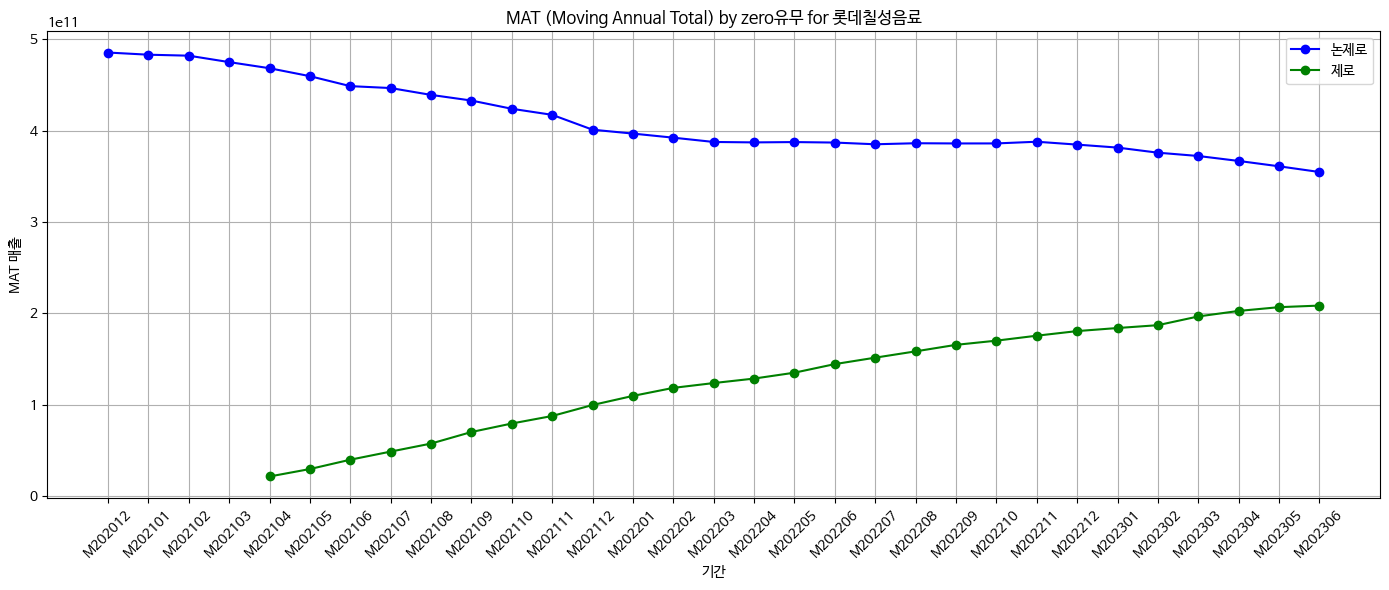

In [ ]:
# '기간' 칼럼을 이용해 데이터 정렬
Carbonated_merge_info = Carbonated_merge_info.sort_values(by='기간')

# 롯데칠성음료를 기준으로 데이터 필터링
lotte_data = Carbonated_merge_info[Carbonated_merge_info['MANUFACTURER 검증'] == '롯데칠성음료']

# MAT 계산 함수
def calculate_MAT(df, start_idx):
    return df.iloc[start_idx:start_idx+12]['매출액'].sum()

# 그래프 그리기 준비
plt.figure(figsize=(14, 6))
colors = ['b', 'g']

# zero유무의 각 값을 기반으로 MAT 계산 및 그래프 그리기
for index, attr in enumerate(lotte_data['zero유무'].unique()):
    # 해당 zero유무의 데이터만 필터링
    attr_data = lotte_data[lotte_data['zero유무'] == attr]
    # 해당 zero유무에 대한 매출액 합산
    grouped_sales = attr_data.groupby('기간')['매출액'].sum().reset_index()
    # 각 기간에 대한 MAT 계산
    MAT_values = [calculate_MAT(grouped_sales, i) for i in range(len(grouped_sales) - 11)]
    # 그래프 그리기
    plt.plot(grouped_sales['기간'][11:], MAT_values, marker='o', color=colors[index], label=attr)

plt.xticks(rotation=45)
plt.title('MAT (Moving Annual Total) by zero유무 for 롯데칠성음료')
plt.xlabel('기간')
plt.ylabel('MAT 매출')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


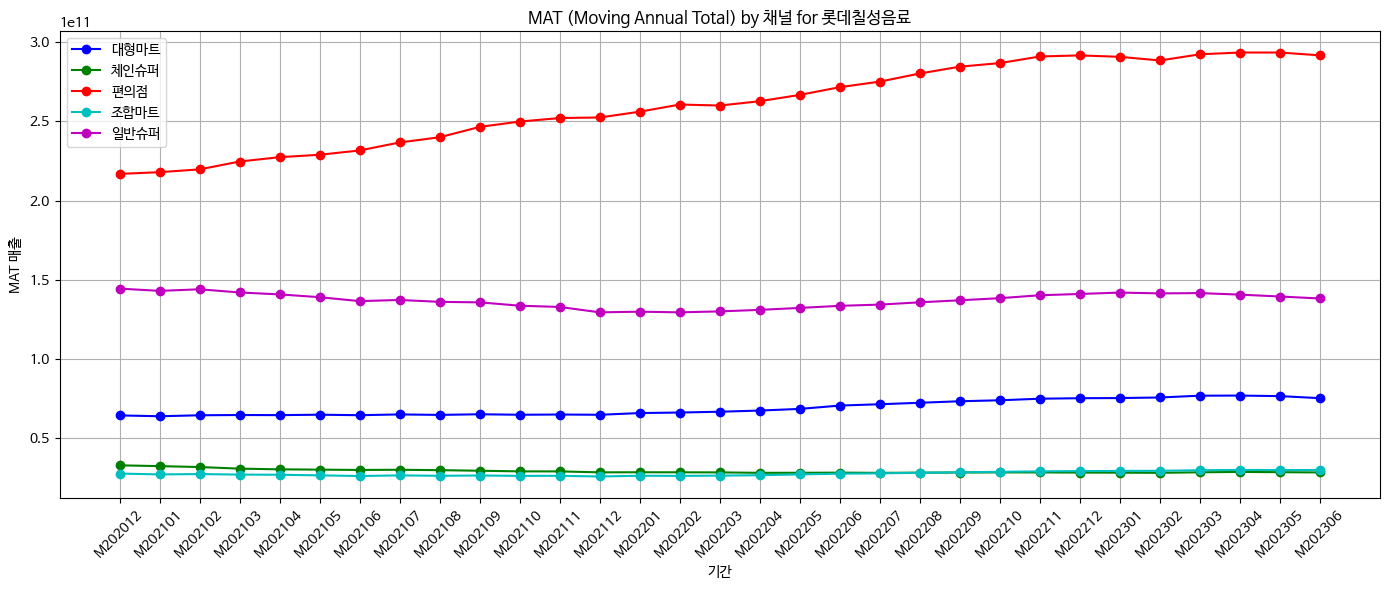

In [ ]:
# '기간' 칼럼을 이용해 데이터 정렬
Carbonated_merge_info = Carbonated_merge_info.sort_values(by='기간')

# 롯데칠성음료를 기준으로 데이터 필터링
lotte_data = Carbonated_merge_info[Carbonated_merge_info['MANUFACTURER 검증'] == '롯데칠성음료']

# MAT 계산 함수
def calculate_MAT(df, start_idx):
    return df.iloc[start_idx:start_idx+12]['매출액'].sum()

# 그래프 그리기 준비
plt.figure(figsize=(14, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y']

# 채널의 각 값을 기반으로 MAT 계산 및 그래프 그리기
for index, attr in enumerate(lotte_data['채널'].unique()):
    # 해당 채널의 데이터만 필터링
    attr_data = lotte_data[lotte_data['채널'] == attr]
    # 해당 채널에 대한 매출액 합산
    grouped_sales = attr_data.groupby('기간')['매출액'].sum().reset_index()
    # 각 기간에 대한 MAT 계산
    MAT_values = [calculate_MAT(grouped_sales, i) for i in range(len(grouped_sales) - 11)]
    # 그래프 그리기
    plt.plot(grouped_sales['기간'][11:], MAT_values, marker='o', color=colors[index], label=attr)

plt.xticks(rotation=45)
plt.title('MAT (Moving Annual Total) by 채널 for 롯데칠성음료')
plt.xlabel('기간')
plt.ylabel('MAT 매출')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# 한국코카콜라 MAT

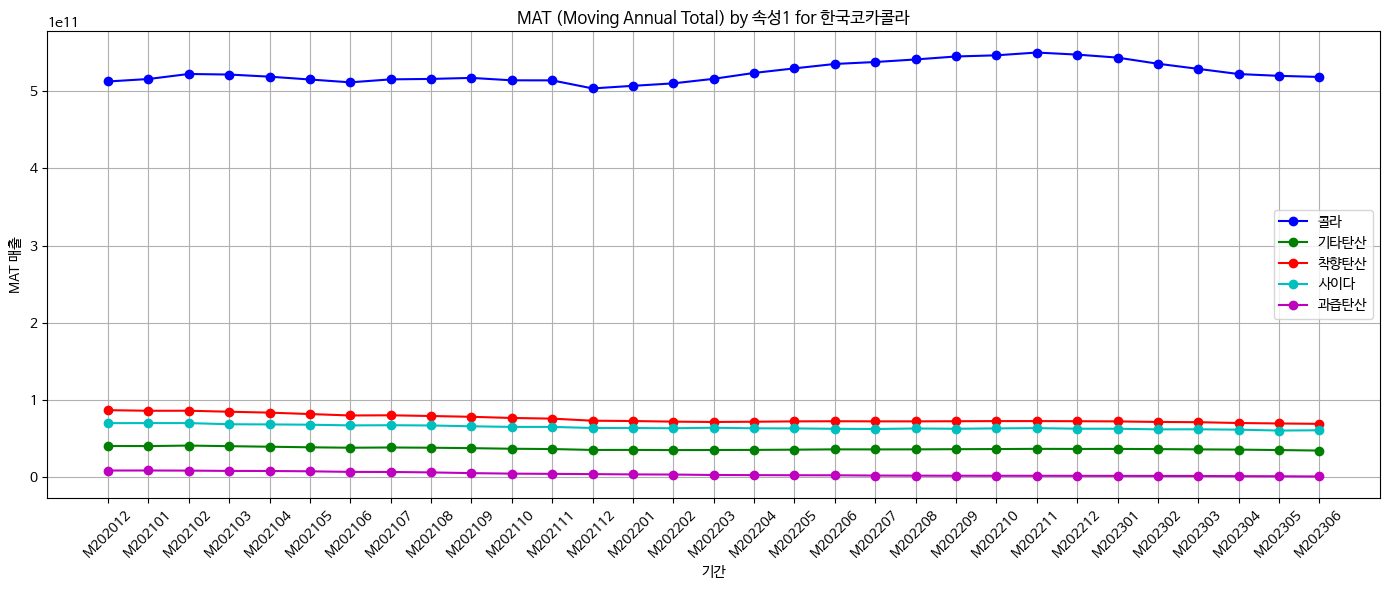

In [ ]:
# '기간' 칼럼을 이용해 데이터 정렬
Carbonated_merge_info = Carbonated_merge_info.sort_values(by='기간')

# 한국코카콜라를 기준으로 데이터 필터링
lotte_data = Carbonated_merge_info[Carbonated_merge_info['MANUFACTURER 검증'] == '한국코카콜라']

# MAT 계산 함수
def calculate_MAT(df, start_idx):
    return df.iloc[start_idx:start_idx+12]['매출액'].sum()

# 그래프 그리기 준비
plt.figure(figsize=(14, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y']

# 속성1의 각 값을 기반으로 MAT 계산 및 그래프 그리기
for index, attr in enumerate(lotte_data['속성1'].unique()):
    # 해당 속성1의 데이터만 필터링
    attr_data = lotte_data[lotte_data['속성1'] == attr]
    # 해당 속성1에 대한 매출액 합산
    grouped_sales = attr_data.groupby('기간')['매출액'].sum().reset_index()
    # 각 기간에 대한 MAT 계산
    MAT_values = [calculate_MAT(grouped_sales, i) for i in range(len(grouped_sales) - 11)]
    # 그래프 그리기
    plt.plot(grouped_sales['기간'][11:], MAT_values, marker='o', color=colors[index], label=attr)

plt.xticks(rotation=45)
plt.title('MAT (Moving Annual Total) by 속성1 for 한국코카콜라')
plt.xlabel('기간')
plt.ylabel('MAT 매출')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


* zero 유무

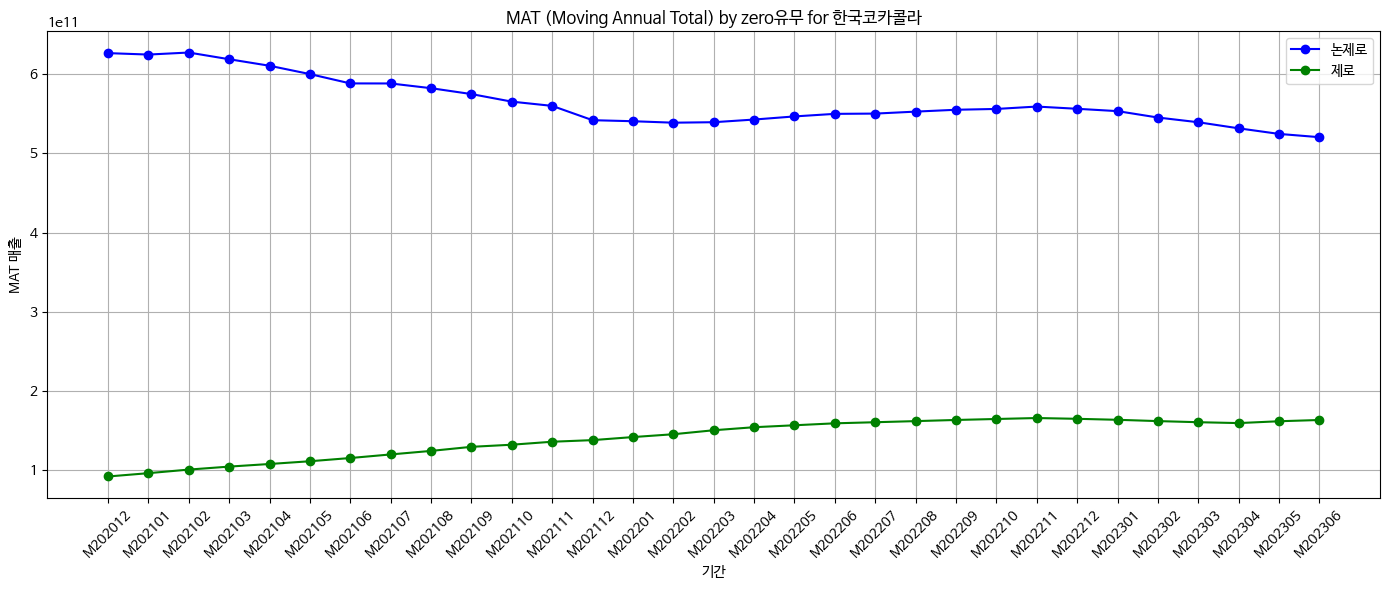

In [ ]:
# '기간' 칼럼을 이용해 데이터 정렬
Carbonated_merge_info = Carbonated_merge_info.sort_values(by='기간')

# 한국코카콜라를 기준으로 데이터 필터링
lotte_data = Carbonated_merge_info[Carbonated_merge_info['MANUFACTURER 검증'] == '한국코카콜라']

# MAT 계산 함수
def calculate_MAT(df, start_idx):
    return df.iloc[start_idx:start_idx+12]['매출액'].sum()

# 그래프 그리기 준비
plt.figure(figsize=(14, 6))
colors = ['b', 'g']

# zero유무의 각 값을 기반으로 MAT 계산 및 그래프 그리기
for index, attr in enumerate(lotte_data['zero유무'].unique()):
    # 해당 zero유무의 데이터만 필터링
    attr_data = lotte_data[lotte_data['zero유무'] == attr]
    # 해당 zero유무에 대한 매출액 합산
    grouped_sales = attr_data.groupby('기간')['매출액'].sum().reset_index()
    # 각 기간에 대한 MAT 계산
    MAT_values = [calculate_MAT(grouped_sales, i) for i in range(len(grouped_sales) - 11)]
    # 그래프 그리기
    plt.plot(grouped_sales['기간'][11:], MAT_values, marker='o', color=colors[index], label=attr)

plt.xticks(rotation=45)
plt.title('MAT (Moving Annual Total) by zero유무 for 한국코카콜라')
plt.xlabel('기간')
plt.ylabel('MAT 매출')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


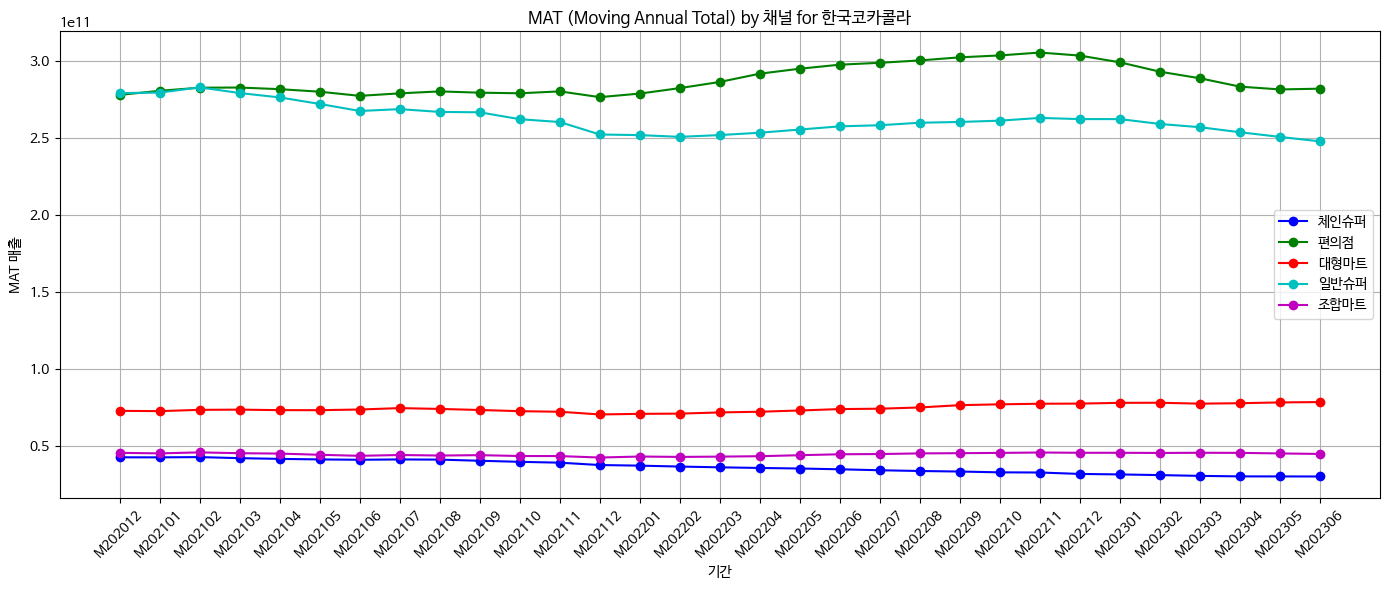

In [ ]:
# '기간' 칼럼을 이용해 데이터 정렬
Carbonated_merge_info = Carbonated_merge_info.sort_values(by='기간')

# 한국코카콜라를 기준으로 데이터 필터링
lotte_data = Carbonated_merge_info[Carbonated_merge_info['MANUFACTURER 검증'] == '한국코카콜라']

# MAT 계산 함수
def calculate_MAT(df, start_idx):
    return df.iloc[start_idx:start_idx+12]['매출액'].sum()

# 그래프 그리기 준비
plt.figure(figsize=(14, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y']

# 채널의 각 값을 기반으로 MAT 계산 및 그래프 그리기
for index, attr in enumerate(lotte_data['채널'].unique()):
    # 해당 채널의 데이터만 필터링
    attr_data = lotte_data[lotte_data['채널'] == attr]
    # 해당 채널에 대한 매출액 합산
    grouped_sales = attr_data.groupby('기간')['매출액'].sum().reset_index()
    # 각 기간에 대한 MAT 계산
    MAT_values = [calculate_MAT(grouped_sales, i) for i in range(len(grouped_sales) - 11)]
    # 그래프 그리기
    plt.plot(grouped_sales['기간'][11:], MAT_values, marker='o', color=colors[index], label=attr)

plt.xticks(rotation=45)
plt.title('MAT (Moving Annual Total) by 채널 for 한국코카콜라')
plt.xlabel('기간')
plt.ylabel('MAT 매출')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# 5WHY 시작

# 가설1.한국코카콜라의 2023년 매출이 2020년에 비해 감소한 이유?


*   한국코카콜라 전체 탄산 그래프







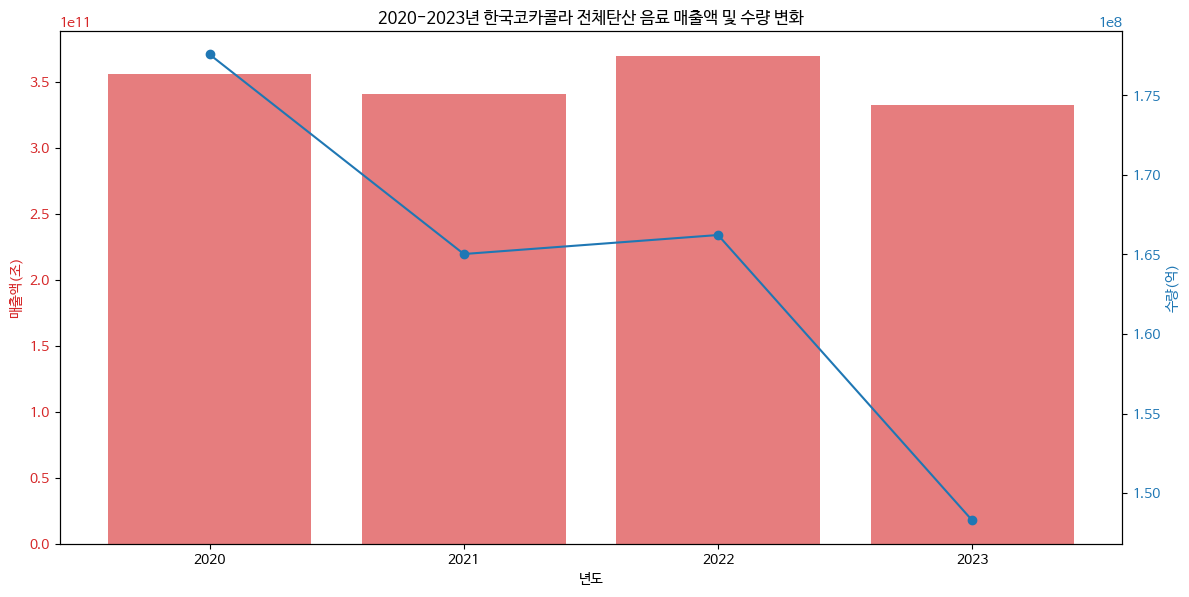

In [ ]:
# 연도별 필터링
filtered_2020 = Carbonated_merge_info[(Carbonated_merge_info['년도'] == '2020') & (Carbonated_merge_info['기간'] <= 'M202006')]
filtered_2021 = Carbonated_merge_info[(Carbonated_merge_info['년도'] == '2021') & (Carbonated_merge_info['기간'] <= 'M202106')]
filtered_2022 = Carbonated_merge_info[(Carbonated_merge_info['년도'] == '2022') & (Carbonated_merge_info['기간'] <= 'M202206')]
filtered_2023 = Carbonated_merge_info[(Carbonated_merge_info['년도'] == '2023') & (Carbonated_merge_info['기간'] <= 'M202306')]

# 한국코카콜라 데이터 필터링
korea_coca_2020 = filtered_2020[filtered_2020['MANUFACTURER 검증'] == '한국코카콜라']
korea_coca_2021 = filtered_2021[filtered_2021['MANUFACTURER 검증'] == '한국코카콜라']
korea_coca_2022 = filtered_2022[filtered_2022['MANUFACTURER 검증'] == '한국코카콜라']
korea_coca_2023 = filtered_2023[filtered_2023['MANUFACTURER 검증'] == '한국코카콜라']

# 연도별 매출액 및 수량 합계 계산
sales_per_year = [korea_coca_2020['매출액'].sum(), korea_coca_2021['매출액'].sum(), korea_coca_2022['매출액'].sum(), korea_coca_2023['매출액'].sum()]
quantity_per_year = [korea_coca_2020['수량'].sum(), korea_coca_2021['수량'].sum(), korea_coca_2022['수량'].sum(), korea_coca_2023['수량'].sum()]

# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(12, 6))

# 매출액 그래프
color = 'tab:red'
ax1.set_xlabel('년도')
ax1.set_ylabel('매출액(조)', color=color)
ax1.bar(['2020', '2021', '2022', '2023'], sales_per_year, color=color, alpha=0.6, label='매출액(조)')
ax1.tick_params(axis='y', labelcolor=color)

# 수량 그래프
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('수량(억)', color=color)
ax2.plot(['2020', '2021', '2022', '2023'], quantity_per_year, color=color, label='수량(억)', marker='o')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('2020-2023년 한국코카콜라 전체탄산 음료 매출액 및 수량 변화')
plt.show()


제로탄산 그래프

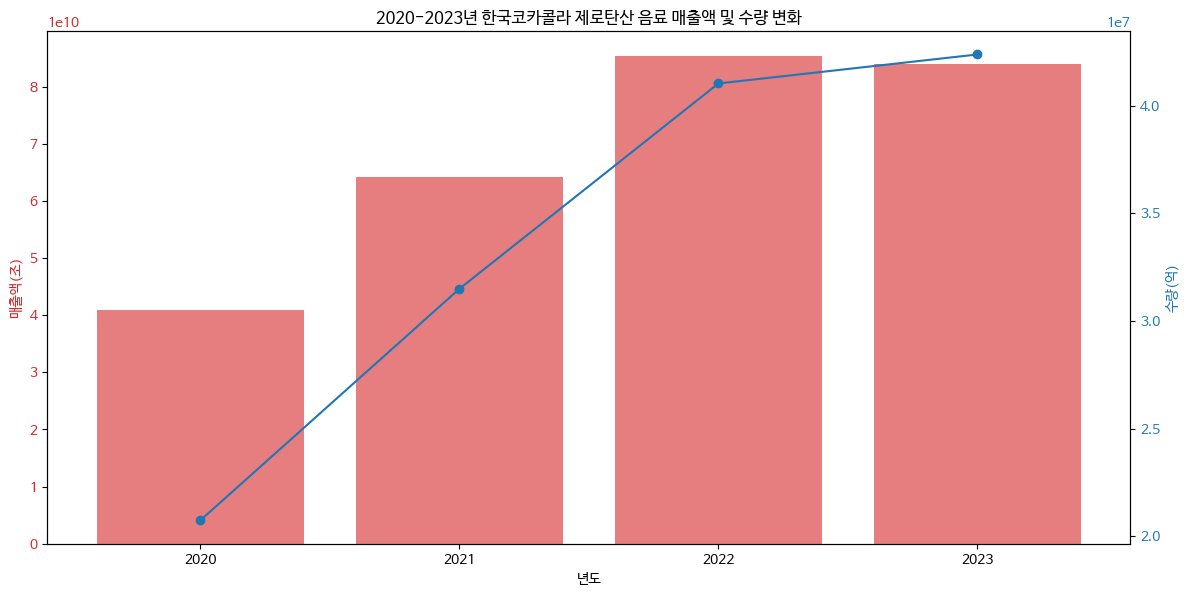

In [ ]:
# zero 기준 데이터 필터링
korea_coca_2020_zero = korea_coca_2020[korea_coca_2020['zero유무'] == '제로']
korea_coca_2021_zero = korea_coca_2021[korea_coca_2021['zero유무'] == '제로']
korea_coca_2022_zero = korea_coca_2022[korea_coca_2022['zero유무'] == '제로']
korea_coca_2023_zero = korea_coca_2023[korea_coca_2023['zero유무'] == '제로']

# 연도별 매출액 및 수량 합계 계산
sales_per_year_zero = [korea_coca_2020_zero['매출액'].sum(), korea_coca_2021_zero['매출액'].sum(), korea_coca_2022_zero['매출액'].sum(), korea_coca_2023_zero['매출액'].sum()]
quantity_per_year_zero = [korea_coca_2020_zero['수량'].sum(), korea_coca_2021_zero['수량'].sum(), korea_coca_2022_zero['수량'].sum(), korea_coca_2023_zero['수량'].sum()]

# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(12, 6))

# 매출액 그래프
color = 'tab:red'
ax1.set_xlabel('년도')
ax1.set_ylabel('매출액(조)', color=color)
ax1.bar(['2020', '2021', '2022', '2023'], sales_per_year_zero, color=color, alpha=0.6, label='매출액(조)')
ax1.tick_params(axis='y', labelcolor=color)

# 수량 그래프
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('수량(억)', color=color)
ax2.plot(['2020', '2021', '2022', '2023'], quantity_per_year_zero, color=color, label='수량(억)', marker='o')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('2020-2023년 한국코카콜라 제로탄산 음료 매출액 및 수량 변화')
plt.show()



논제로 그래프

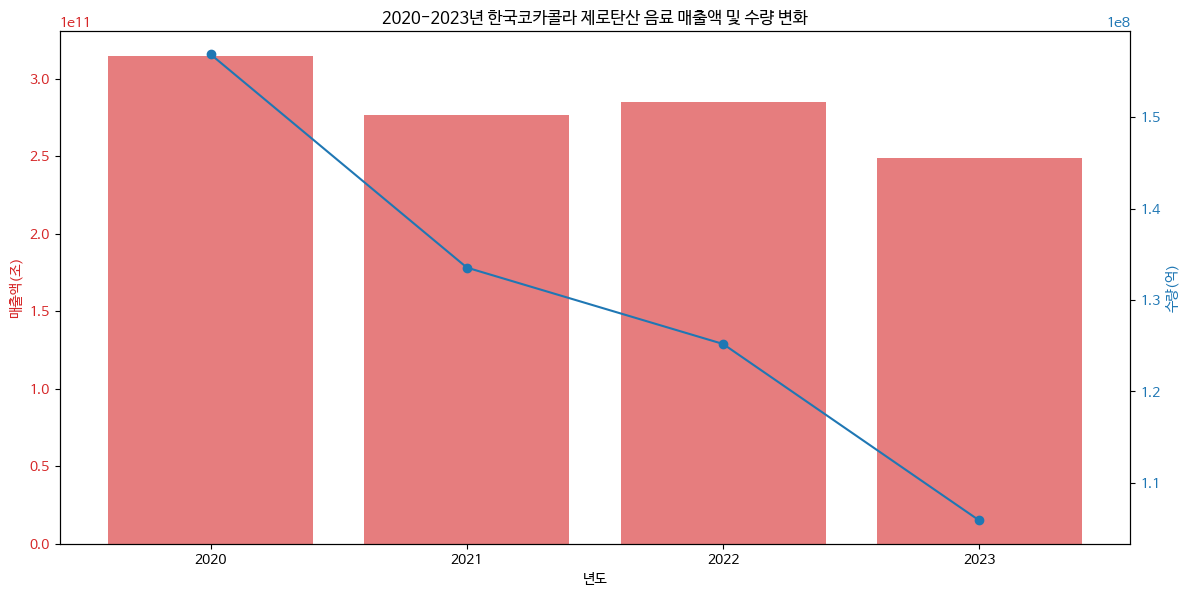

In [ ]:
# zero 기준 데이터 필터링
korea_coca_2020_zero = korea_coca_2020[korea_coca_2020['zero유무'] == '논제로']
korea_coca_2021_zero = korea_coca_2021[korea_coca_2021['zero유무'] == '논제로']
korea_coca_2022_zero = korea_coca_2022[korea_coca_2022['zero유무'] == '논제로']
korea_coca_2023_zero = korea_coca_2023[korea_coca_2023['zero유무'] == '논제로']

# 연도별 매출액 및 수량 합계 계산
sales_per_year_zero = [korea_coca_2020_zero['매출액'].sum(), korea_coca_2021_zero['매출액'].sum(), korea_coca_2022_zero['매출액'].sum(), korea_coca_2023_zero['매출액'].sum()]
quantity_per_year_zero = [korea_coca_2020_zero['수량'].sum(), korea_coca_2021_zero['수량'].sum(), korea_coca_2022_zero['수량'].sum(), korea_coca_2023_zero['수량'].sum()]

# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(12, 6))

# 매출액 그래프
color = 'tab:red'
ax1.set_xlabel('년도')
ax1.set_ylabel('매출액(조)', color=color)
ax1.bar(['2020', '2021', '2022', '2023'], sales_per_year_zero, color=color, alpha=0.6, label='매출액(조)')
ax1.tick_params(axis='y', labelcolor=color)

# 수량 그래프
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('수량(억)', color=color)
ax2.plot(['2020', '2021', '2022', '2023'], quantity_per_year_zero, color=color, label='수량(억)', marker='o')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('2020-2023년 한국코카콜라 제로탄산 음료 매출액 및 수량 변화')
plt.show()



롯데칠성음료 매출과 수량 데이터


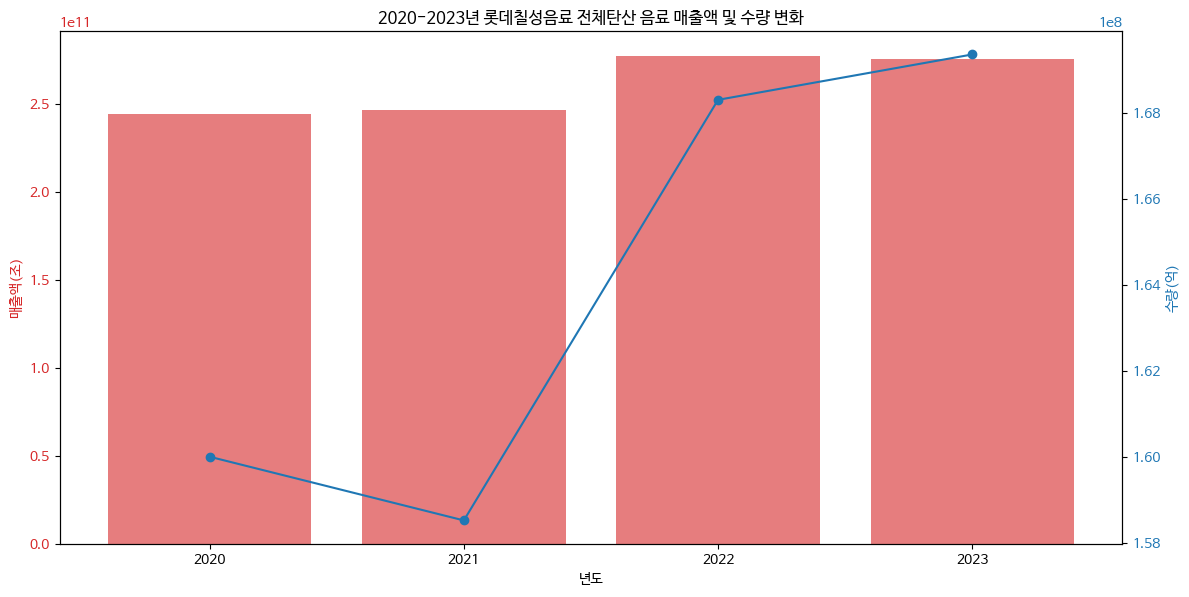

In [ ]:
# 연도별 필터링
filtered_2020 = Carbonated_merge_info[(Carbonated_merge_info['년도'] == '2020') & (Carbonated_merge_info['기간'] <= 'M202006')]
filtered_2021 = Carbonated_merge_info[(Carbonated_merge_info['년도'] == '2021') & (Carbonated_merge_info['기간'] <= 'M202106')]
filtered_2022 = Carbonated_merge_info[(Carbonated_merge_info['년도'] == '2022') & (Carbonated_merge_info['기간'] <= 'M202206')]
filtered_2023 = Carbonated_merge_info[(Carbonated_merge_info['년도'] == '2023') & (Carbonated_merge_info['기간'] <= 'M202306')]

# 롯데칠성음료 데이터 필터링
lotte_seven_2020 = filtered_2020[filtered_2020['MANUFACTURER 검증'] == '롯데칠성음료']
lotte_seven_2021 = filtered_2021[filtered_2021['MANUFACTURER 검증'] == '롯데칠성음료']
lotte_seven_2022 = filtered_2022[filtered_2022['MANUFACTURER 검증'] == '롯데칠성음료']
lotte_seven_2023 = filtered_2023[filtered_2023['MANUFACTURER 검증'] == '롯데칠성음료']

# 연도별 매출액 및 수량 합계 계산
sales_per_year = [lotte_seven_2020['매출액'].sum(), lotte_seven_2021['매출액'].sum(), lotte_seven_2022['매출액'].sum(), lotte_seven_2023['매출액'].sum()]
quantity_per_year = [lotte_seven_2020['수량'].sum(), lotte_seven_2021['수량'].sum(), lotte_seven_2022['수량'].sum(), lotte_seven_2023['수량'].sum()]

# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(12, 6))

# 매출액 그래프
color = 'tab:red'
ax1.set_xlabel('년도')
ax1.set_ylabel('매출액(조)', color=color)
ax1.bar(['2020', '2021', '2022', '2023'], sales_per_year, color=color, alpha=0.6, label='매출액(조)')
ax1.tick_params(axis='y', labelcolor=color)

# 수량 그래프
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('수량(억)', color=color)
ax2.plot(['2020', '2021', '2022', '2023'], quantity_per_year, color=color, label='수량(억)', marker='o')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('2020-2023년 롯데칠성음료 전체탄산 음료 매출액 및 수량 변화')
plt.show()


롯데칠성 제로 판매

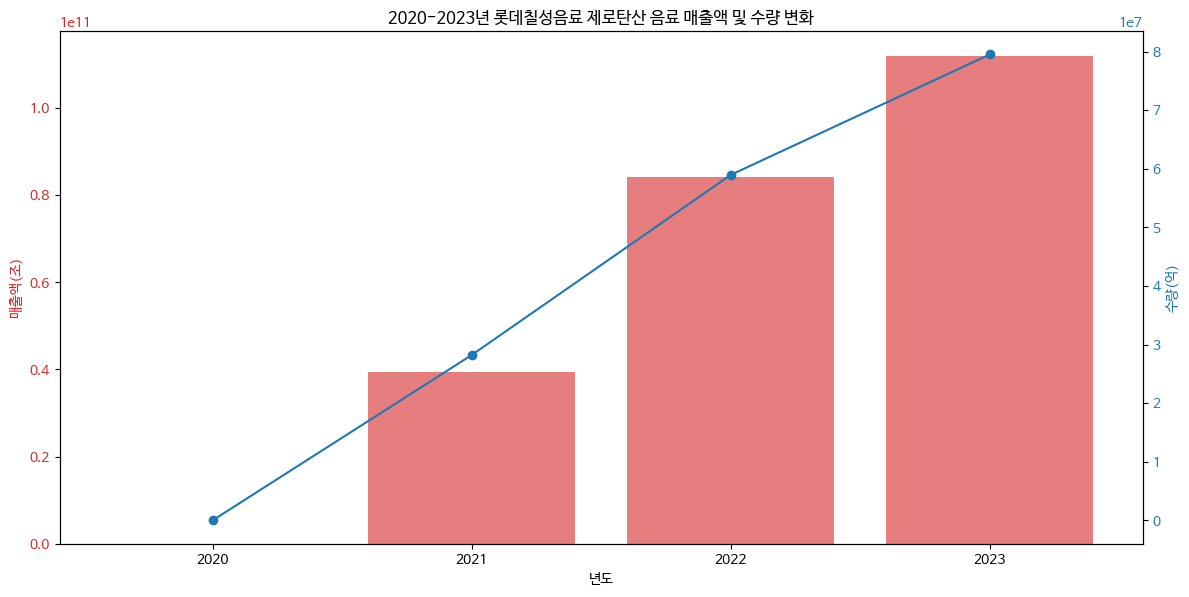

In [ ]:
# zero 기준 데이터 필터링
lotte_seven_2020_zero = lotte_seven_2020[lotte_seven_2020['zero유무'] == '제로']
lotte_seven_2021_zero = lotte_seven_2021[lotte_seven_2021['zero유무'] == '제로']
lotte_seven_2022_zero = lotte_seven_2022[lotte_seven_2022['zero유무'] == '제로']
lotte_seven_2023_zero = lotte_seven_2023[lotte_seven_2023['zero유무'] == '제로']

# 연도별 매출액 및 수량 합계 계산
sales_per_year_zero = [lotte_seven_2020_zero['매출액'].sum(), lotte_seven_2021_zero['매출액'].sum(), lotte_seven_2022_zero['매출액'].sum(), lotte_seven_2023_zero['매출액'].sum()]
quantity_per_year_zero = [lotte_seven_2020_zero['수량'].sum(), lotte_seven_2021_zero['수량'].sum(), lotte_seven_2022_zero['수량'].sum(), lotte_seven_2023_zero['수량'].sum()]

# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(12, 6))

# 매출액 그래프
color = 'tab:red'
ax1.set_xlabel('년도')
ax1.set_ylabel('매출액(조)', color=color)
ax1.bar(['2020', '2021', '2022', '2023'], sales_per_year_zero, color=color, alpha=0.6, label='매출액(조)')
ax1.tick_params(axis='y', labelcolor=color)

# 수량 그래프
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('수량(억)', color=color)
ax2.plot(['2020', '2021', '2022', '2023'], quantity_per_year_zero, color=color, label='수량(억)', marker='o')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('2020-2023년 롯데칠성음료 제로탄산 음료 매출액 및 수량 변화')
plt.show()



* 롯데칠성 일반 탄산

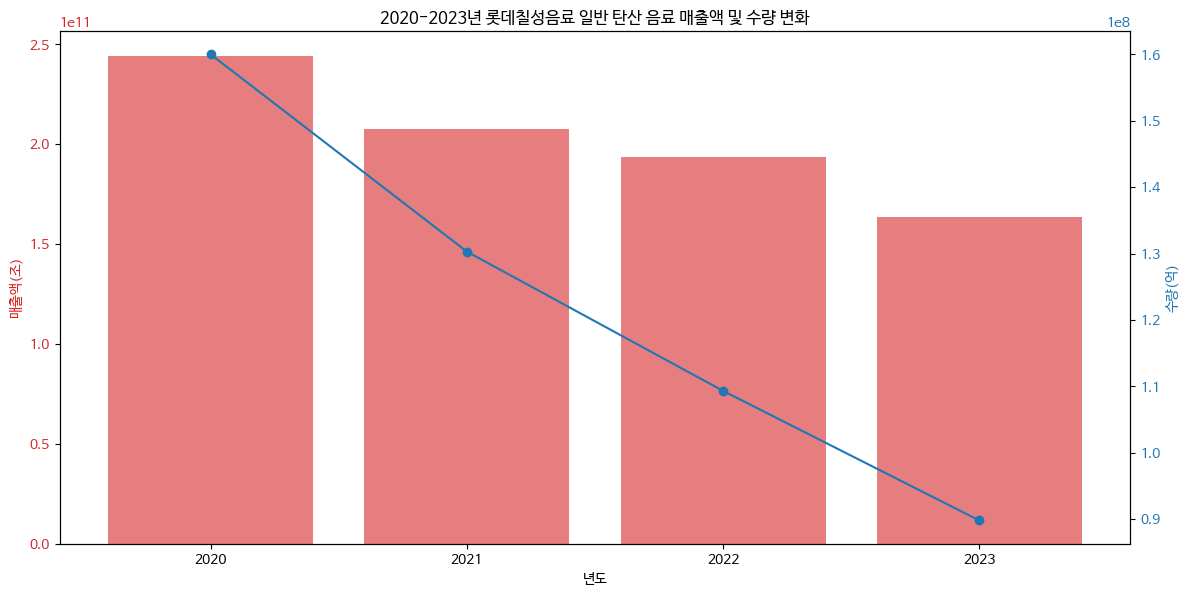

In [ ]:
# zero 기준 데이터 필터링
lotte_seven_2020_zero = lotte_seven_2020[lotte_seven_2020['zero유무'] == '논제로']
lotte_seven_2021_zero = lotte_seven_2021[lotte_seven_2021['zero유무'] == '논제로']
lotte_seven_2022_zero = lotte_seven_2022[lotte_seven_2022['zero유무'] == '논제로']
lotte_seven_2023_zero = lotte_seven_2023[lotte_seven_2023['zero유무'] == '논제로']

# 연도별 매출액 및 수량 합계 계산
sales_per_year_zero = [lotte_seven_2020_zero['매출액'].sum(), lotte_seven_2021_zero['매출액'].sum(), lotte_seven_2022_zero['매출액'].sum(), lotte_seven_2023_zero['매출액'].sum()]
quantity_per_year_zero = [lotte_seven_2020_zero['수량'].sum(), lotte_seven_2021_zero['수량'].sum(), lotte_seven_2022_zero['수량'].sum(), lotte_seven_2023_zero['수량'].sum()]

# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(12, 6))

# 매출액 그래프
color = 'tab:red'
ax1.set_xlabel('년도')
ax1.set_ylabel('매출액(조)', color=color)
ax1.bar(['2020', '2021', '2022', '2023'], sales_per_year_zero, color=color, alpha=0.6, label='매출액(조)')
ax1.tick_params(axis='y', labelcolor=color)

# 수량 그래프
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('수량(억)', color=color)
ax2.plot(['2020', '2021', '2022', '2023'], quantity_per_year_zero, color=color, label='수량(억)', marker='o')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('2020-2023년 롯데칠성음료 일반 탄산 음료 매출액 및 수량 변화')
plt.show()



* 롯데 칠성음료 제로 브랜드 증가율

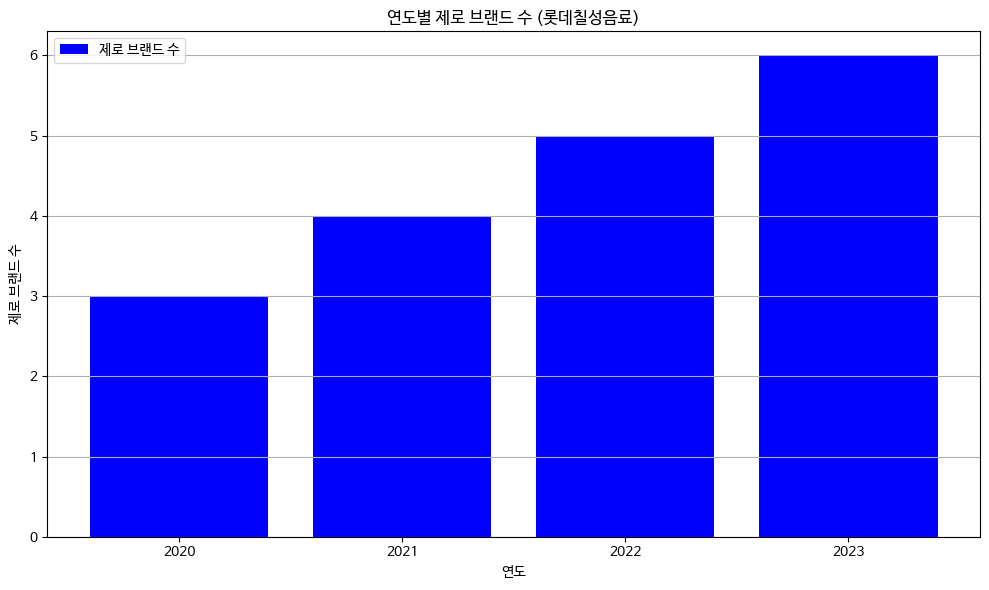

In [ ]:
# '롯데칠성음료' 및 '제로'를 기준으로 데이터 필터링
lotte_zero_data = Carbonated_merge_info[(Carbonated_merge_info['MANUFACTURER 검증'] == '롯데칠성음료') & (Carbonated_merge_info['zero유무'] == '제로')]


# 연도별로 필터링하여 브랜드의 총 수 계산
years = ['2020', '2021', '2022', '2023']
yearly_brand_counts = []

for year in years:
    yearly_data = lotte_zero_data[lotte_zero_data['기간'].str.contains(year)]
    yearly_brand_count = yearly_data['BRANDMAIN'].nunique()
    yearly_brand_counts.append(yearly_brand_count)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(years, yearly_brand_counts, color='b', label='제로 브랜드 수')
plt.title('연도별 제로 브랜드 수 (롯데칠성음료)')
plt.xlabel('연도')
plt.ylabel('제로 브랜드 수')
plt.grid(axis='y')
plt.legend()
plt.tight_layout()
plt.show()


* 롯데칠성음료 논제로 브랜드

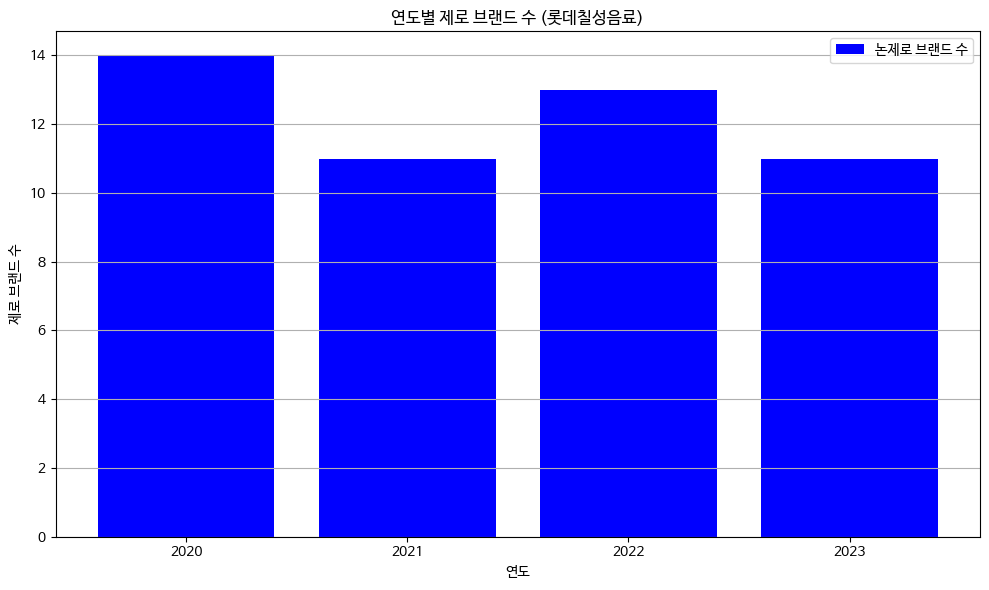

In [ ]:
# '롯데칠성음료' 및 '제로'를 기준으로 데이터 필터링
lotte_zero_data = Carbonated_merge_info[(Carbonated_merge_info['MANUFACTURER 검증'] == '롯데칠성음료') & (Carbonated_merge_info['zero유무'] == '논제로')]


# 연도별로 필터링하여 브랜드의 총 수 계산
years = ['2020', '2021', '2022', '2023']
yearly_brand_counts = []

for year in years:
    yearly_data = lotte_zero_data[lotte_zero_data['기간'].str.contains(year)]
    yearly_brand_count = yearly_data['BRANDMAIN'].nunique()
    yearly_brand_counts.append(yearly_brand_count)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(years, yearly_brand_counts, color='b', label='논제로 브랜드 수')
plt.title('연도별 제로 브랜드 수 (롯데칠성음료)')
plt.xlabel('연도')
plt.ylabel('제로 브랜드 수')
plt.grid(axis='y')
plt.legend()
plt.tight_layout()
plt.show()


* 한국코카콜라 제로 브랜드

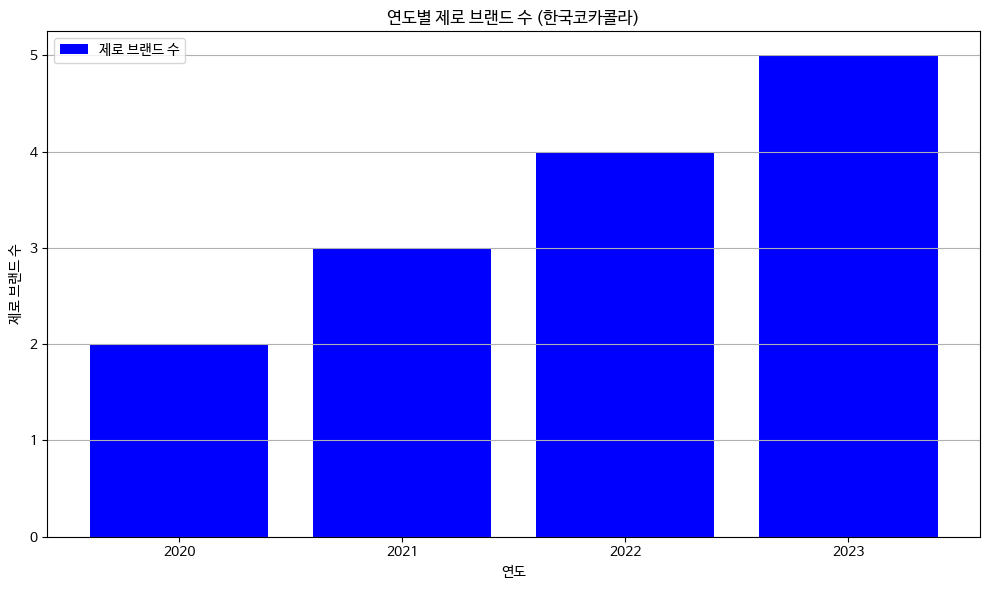

In [ ]:
# '한국코카콜라' 및 '제로'를 기준으로 데이터 필터링
korea_cola_data = Carbonated_merge_info[(Carbonated_merge_info['MANUFACTURER 검증'] == '한국코카콜라') & (Carbonated_merge_info['zero유무'] == '제로')]


# 연도별로 필터링하여 브랜드의 총 수 계산
years = ['2020', '2021', '2022', '2023']
yearly_brand_counts = []

for year in years:
    yearly_data = korea_cola_data[korea_cola_data['기간'].str.contains(year)]
    yearly_brand_count = yearly_data['BRANDMAIN'].nunique()
    yearly_brand_counts.append(yearly_brand_count)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(years, yearly_brand_counts, color='b', label='제로 브랜드 수')
plt.title('연도별 제로 브랜드 수 (한국코카콜라)')
plt.xlabel('연도')
plt.ylabel('제로 브랜드 수')
plt.grid(axis='y')
plt.legend()
plt.tight_layout()
plt.show()


* 한국코카콜라 논제로 브랜드 수

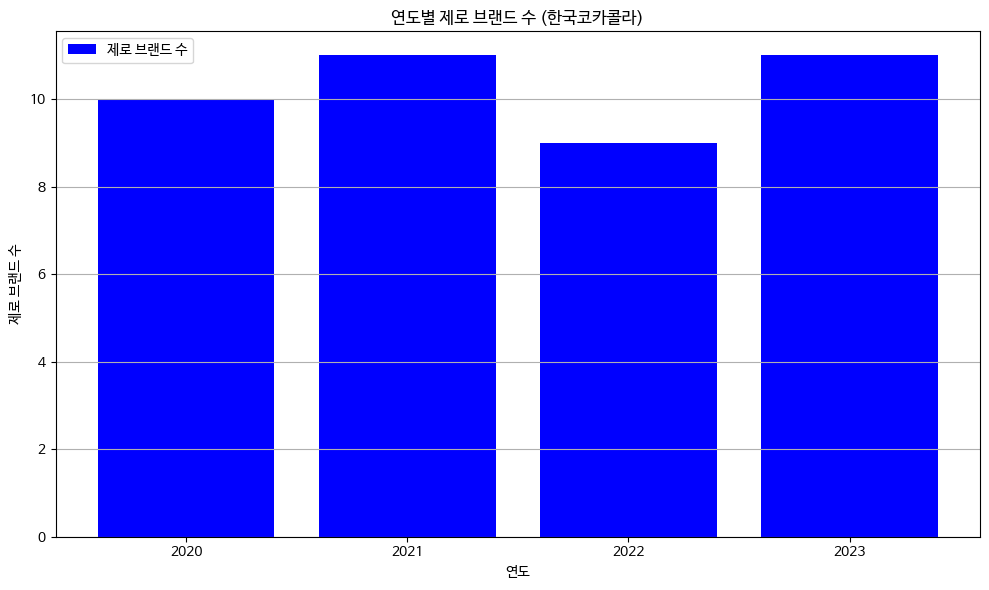

In [ ]:
# '한국코카콜라' 및 '제로'를 기준으로 데이터 필터링
korea_cola_data = Carbonated_merge_info[(Carbonated_merge_info['MANUFACTURER 검증'] == '한국코카콜라') & (Carbonated_merge_info['zero유무'] == '논제로')]


# 연도별로 필터링하여 브랜드의 총 수 계산
years = ['2020', '2021', '2022', '2023']
yearly_brand_counts = []

for year in years:
    yearly_data = korea_cola_data[korea_cola_data['기간'].str.contains(year)]
    yearly_brand_count = yearly_data['BRANDMAIN'].nunique()
    yearly_brand_counts.append(yearly_brand_count)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(years, yearly_brand_counts, color='b', label='제로 브랜드 수')
plt.title('연도별 논제로 브랜드 수 (한국코카콜라)')
plt.xlabel('연도')
plt.ylabel('제로 브랜드 수')
plt.grid(axis='y')
plt.legend()
plt.tight_layout()
plt.show()


# 가설2. 한국코카콜라와 롯데칠성음료의 주요 판매 채널에서의 매출감소 MAT

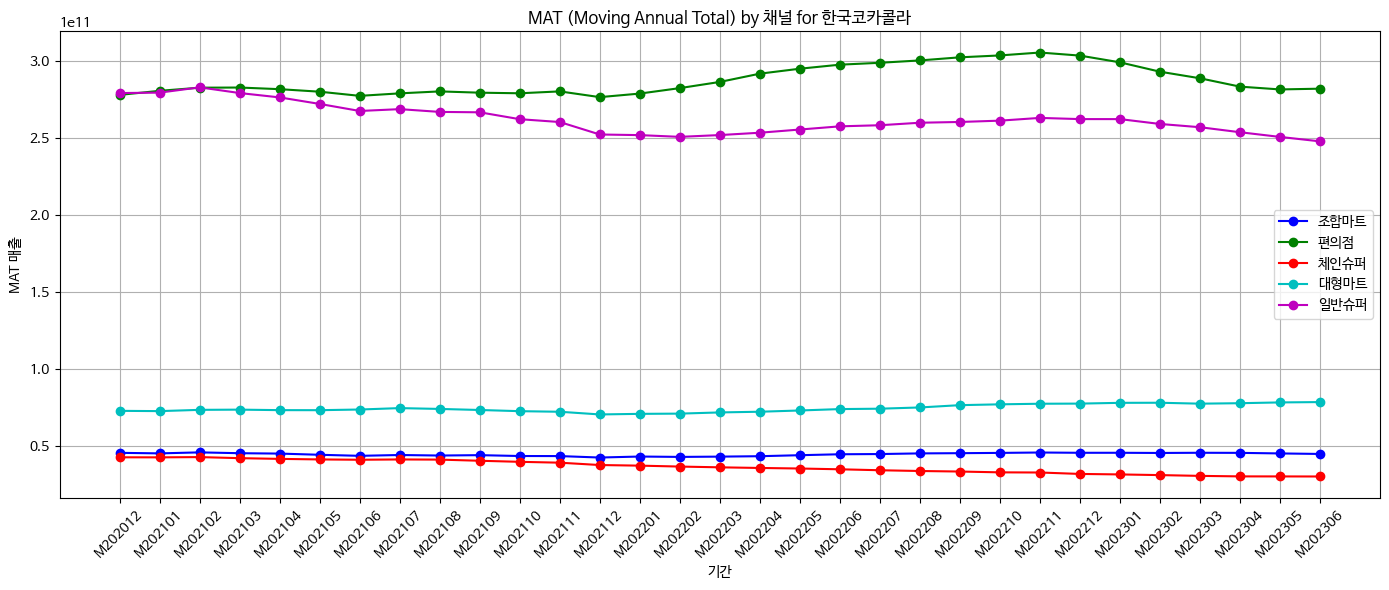

In [ ]:
# '기간' 칼럼을 이용해 데이터 정렬
Carbonated_merge_info = Carbonated_merge_info.sort_values(by='기간')

# 한국코카콜라를 기준으로 데이터 필터링
lotte_data = Carbonated_merge_info[Carbonated_merge_info['MANUFACTURER 검증'] == '한국코카콜라']

# MAT 계산 함수
def calculate_MAT(df, start_idx):
    return df.iloc[start_idx:start_idx+12]['매출액'].sum()

# 그래프 그리기 준비
plt.figure(figsize=(14, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y']

# 채널의 각 값을 기반으로 MAT 계산 및 그래프 그리기
for index, attr in enumerate(lotte_data['채널'].unique()):
    # 해당 채널의 데이터만 필터링
    attr_data = lotte_data[lotte_data['채널'] == attr]
    # 해당 채널에 대한 매출액 합산
    grouped_sales = attr_data.groupby('기간')['매출액'].sum().reset_index()
    # 각 기간에 대한 MAT 계산
    MAT_values = [calculate_MAT(grouped_sales, i) for i in range(len(grouped_sales) - 11)]
    # 그래프 그리기
    plt.plot(grouped_sales['기간'][11:], MAT_values, marker='o', color=colors[index], label=attr)

plt.xticks(rotation=45)
plt.title('MAT (Moving Annual Total) by 채널 for 한국코카콜라')
plt.xlabel('기간')
plt.ylabel('MAT 매출')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


* 롯데칠성음료 채널별 MAT 매출 그래프

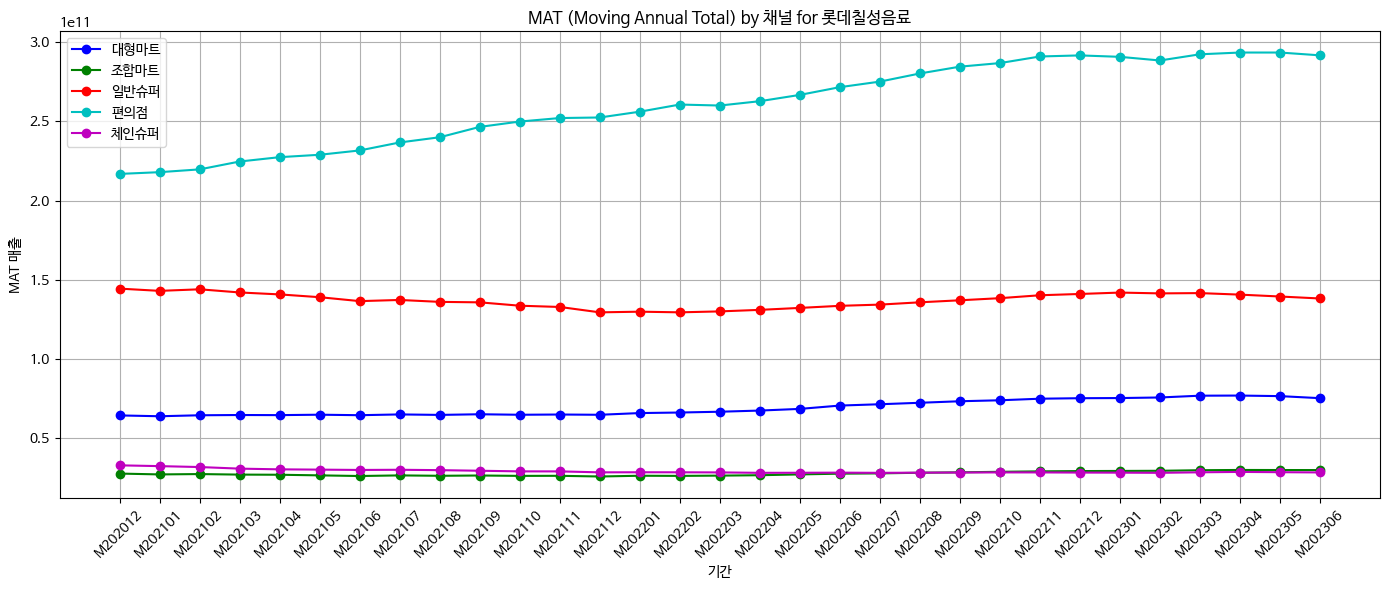

In [ ]:
# '기간' 칼럼을 이용해 데이터 정렬
Carbonated_merge_info = Carbonated_merge_info.sort_values(by='기간')

# 롯데칠성음료를 기준으로 데이터 필터링
lotte_data = Carbonated_merge_info[Carbonated_merge_info['MANUFACTURER 검증'] == '롯데칠성음료']

# MAT 계산 함수
def calculate_MAT(df, start_idx):
    return df.iloc[start_idx:start_idx+12]['매출액'].sum()

# 그래프 그리기 준비
plt.figure(figsize=(14, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y']

# 채널의 각 값을 기반으로 MAT 계산 및 그래프 그리기
for index, attr in enumerate(lotte_data['채널'].unique()):
    # 해당 채널의 데이터만 필터링
    attr_data = lotte_data[lotte_data['채널'] == attr]
    # 해당 채널에 대한 매출액 합산
    grouped_sales = attr_data.groupby('기간')['매출액'].sum().reset_index()
    # 각 기간에 대한 MAT 계산
    MAT_values = [calculate_MAT(grouped_sales, i) for i in range(len(grouped_sales) - 11)]
    # 그래프 그리기
    plt.plot(grouped_sales['기간'][11:], MAT_values, marker='o', color=colors[index], label=attr)

plt.xticks(rotation=45)
plt.title('MAT (Moving Annual Total) by 채널 for 롯데칠성음료')
plt.xlabel('기간')
plt.ylabel('MAT 매출')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# 가설3. 롯데 칠성음료와 비교 했을 때 한국코카코라의 매출 MAT 차이

<ipython-input-118-a89222528bbe>:70: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


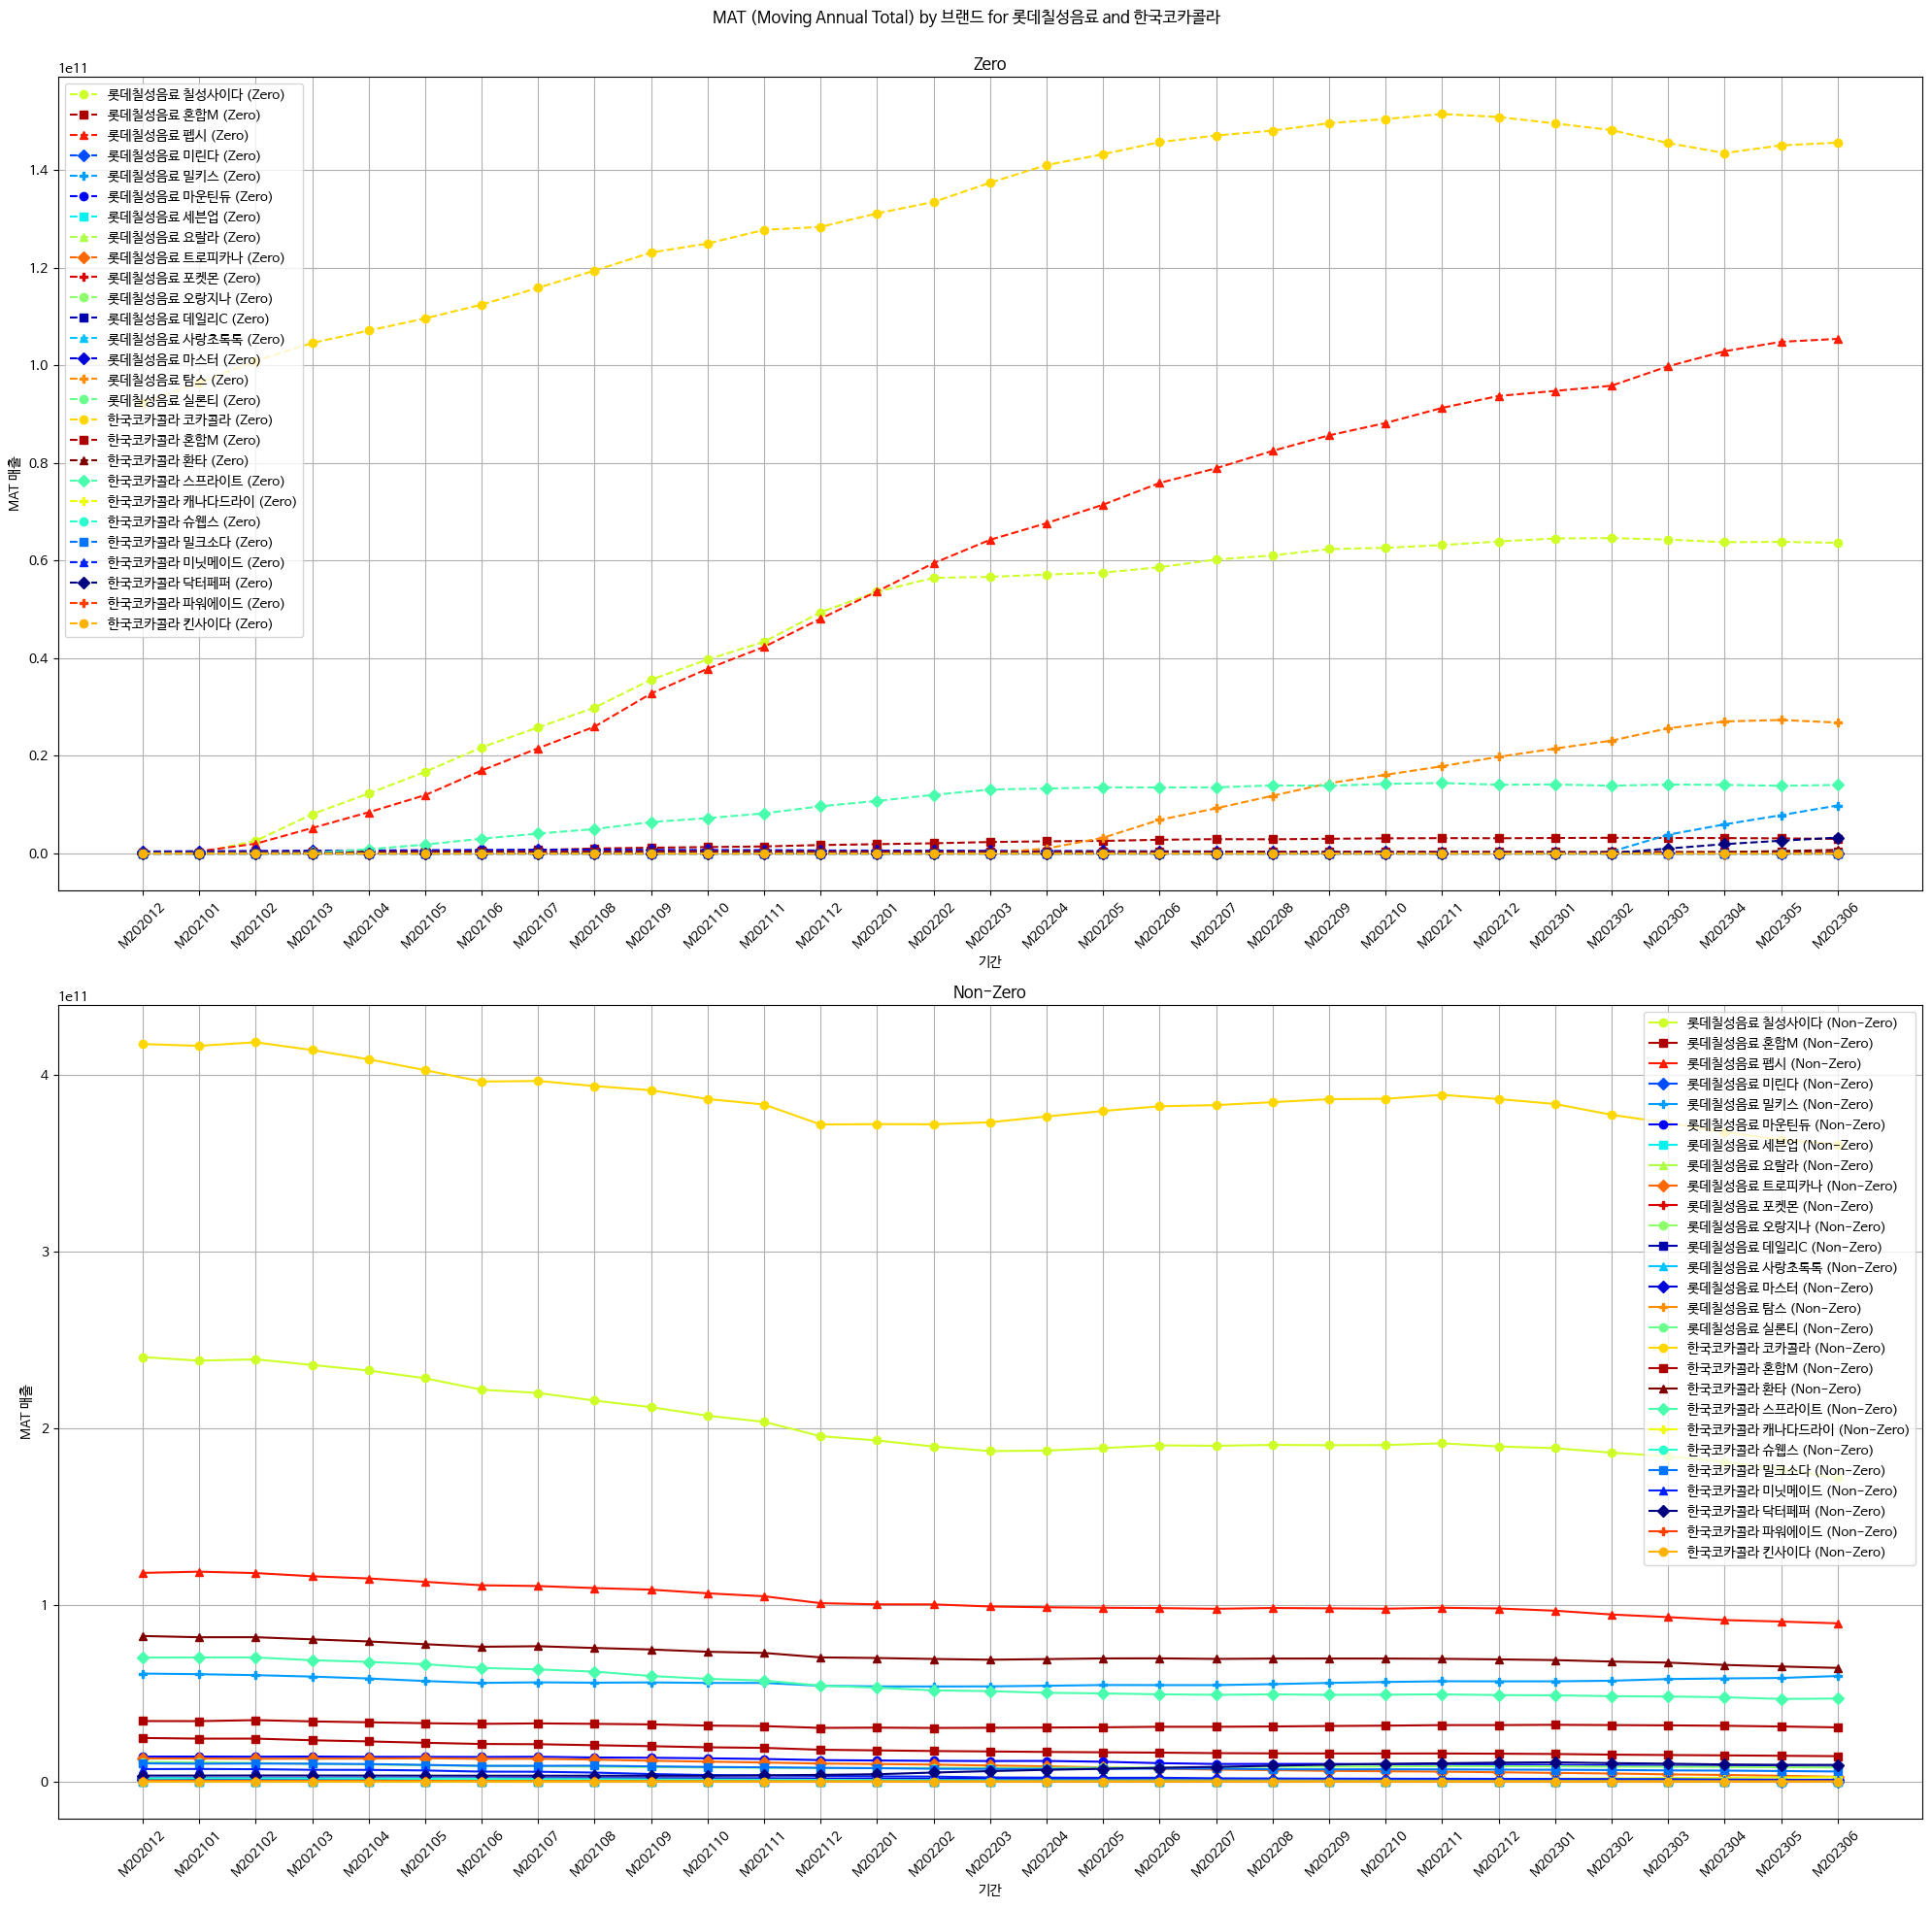

In [ ]:
# MAT 계산 함수
def calculate_MAT(df, start_idx):
    return df.iloc[start_idx:start_idx+12]['매출액'].sum()

def convert_date_str(date_str):
    return (int(date_str[1:5]), int(date_str[6:]))

# 기간 설정
full_date_range = [f"M20200{i}" for i in range(1, 10)] + [f"M2020{i}" for i in range(10, 13)] + \
                  [f"M20210{i}" for i in range(1, 10)] + [f"M2021{i}" for i in range(10, 13)] + \
                  [f"M20220{i}" for i in range(1, 10)] + [f"M2022{i}" for i in range(10, 13)] + \
                  [f"M20230{i}" for i in range(1, 7)]

# 롯데칠성음료와 한국코카콜라를 기준으로 데이터 필터링
# 수정된 코드
lotte_data = Carbonated_merge_info[(Carbonated_merge_info['MANUFACTURER 검증'] == '롯데칠성음료')]

cocacola_data = Carbonated_merge_info[(Carbonated_merge_info['MANUFACTURER 검증'] == '한국코카콜라')]

# 그래프 그리기 준비
fig, axes = plt.subplots(2, 1, figsize=(20, 20))
axes = axes.ravel()

# 색상 자동 생성
unique_brands = np.unique(np.concatenate([lotte_data['BRANDMAIN'].unique(), cocacola_data['BRANDMAIN'].unique()]))
unique_colors = plt.cm.jet(np.linspace(0, 1, len(unique_brands)))

# 마커 리스트
marker_list = ['o', 's', '^', 'D', 'P']

def plot_partial_MAT_graph(df, manufacturer, color_dict, ax):
    for index, brand in enumerate(df['BRANDMAIN'].unique()):
        color = color_dict.get(brand, 'b')
        marker = marker_list[index % len(marker_list)]

        brand_data_zero = df[(df['BRANDMAIN'] == brand) & (df['zero유무'] == '제로')]
        brand_data_nonzero = df[(df['BRANDMAIN'] == brand) & (df['zero유무'] == '논제로')]

        # 여기서 기간 데이터를 정렬하고 누락된 데이터를 채워 넣습니다.
        full_data_zero = pd.DataFrame({'기간': full_date_range})
        full_data_nonzero = pd.DataFrame({'기간': full_date_range})

        grouped_sales_zero = brand_data_zero.groupby('기간')['매출액'].sum().reset_index().sort_values('기간')
        grouped_sales_zero = pd.merge(full_data_zero, grouped_sales_zero, on='기간', how='left').fillna(0)

        grouped_sales_nonzero = brand_data_nonzero.groupby('기간')['매출액'].sum().reset_index().sort_values('기간')
        grouped_sales_nonzero = pd.merge(full_data_nonzero, grouped_sales_nonzero, on='기간', how='left').fillna(0)

        if len(grouped_sales_zero) >= 12:
            grouped_sales_zero = grouped_sales_zero.sort_values('기간')  # <-- 이 부분 추가
            MAT_values_zero = [calculate_MAT(grouped_sales_zero, i) for i in range(len(grouped_sales_zero) - 11)]
            ax[0].plot(grouped_sales_zero['기간'][11:], MAT_values_zero, marker=marker, color=color, linestyle='--', label=f"{manufacturer} {brand} (Zero)")

        if len(grouped_sales_nonzero) >= 12:
            grouped_sales_nonzero = grouped_sales_nonzero.sort_values('기간')  # <-- 이 부분 추가
            MAT_values_nonzero = [calculate_MAT(grouped_sales_nonzero, i) for i in range(len(grouped_sales_nonzero) - 11)]
            ax[1].plot(grouped_sales_nonzero['기간'][11:], MAT_values_nonzero, marker=marker, color=color, label=f"{manufacturer} {brand} (Non-Zero)")

# 브랜드와 색상을 매핑
brand_color_dict = {brand: color for brand, color in zip(unique_brands, unique_colors)}

plot_partial_MAT_graph(lotte_data, '롯데칠성음료', brand_color_dict, axes)
plot_partial_MAT_graph(cocacola_data, '한국코카콜라', brand_color_dict, axes)


axes[0].set_title('Zero')
axes[1].set_title('Non-Zero')

for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_xlabel('기간')
    ax.set_ylabel('MAT 매출')
    ax.grid(True)
    ax.legend()

plt.suptitle('MAT (Moving Annual Total) by 브랜드 for 롯데칠성음료 and 한국코카콜라')
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

# 가설4 한국코카콜라 롯데칠성음료 단가 비교